### Music Popularity

Table of Contents:
1. Problem Statement
2. Data Collection
3. Data Cleaning and Organizing
3. EDA
4. EDA Summary
5. Model
6. Model Evaluation
7. Conclusion
8. Follow ups/Next Steps



# 1. Problem Statement

A key component of marketing a product is being able to stand out in front of the 
masses. The best chance of having success is to make sure you get your message or product is presented in front of the most eyes as possible. Once that is done succesfully, the goal is to have potential customer interact with what you are offering and let the product's value speak for itself.

As a fan of all different types of music, I'm always excited to find new artist that I enjoy. When I'm interesting in finding new music as a consumer, I either rely on recommendations from music services (Pandora, Spotify, Soundcloud), or I manually search for music based on different features (genre, decade, friend's music tastes, geographic location, recording labels). 

With a large and saturated music landscape, many great artists are always unidentified or acknowledged. Trying to understand the other side for artists and music creators, are there certain things an artist can do to have his music identified or acknowledged. One key way an artist can get noticed is posting music online, then self-identifying what type of music they have created by linking it with genre and music-type tags. 

Knowing that a artist must add it's own tags to it's music, can we determine if there are certain tags that will help an artist gain "popularity" and "familiarity" with a fan base? Similarly, once an artist has captured a users attention by getting their music infront of their eyes and ready for a listen, can artist increease their chances of "popularity" and "familiarity" by capturing the user's interest by using certain words in the song's title or certain words in the song? 

Now, these  tactics are just ideas for an artist to increase his chances of someone listening to his music and putting him/herself in the best position to gain "popularity" and "familarity". The question of whether or not the person who listen's to the music enjoys it is all dependent on the quality of the musician and their product - the actual content and quality of the song.

# 2. Data Collection

The data I collected for this project consisted majorityly from the following resource, "The Million Song Data" challenge. For my work, I used a subset of the data (~10,000 songs) which included the song title, song unique identifier (UI), artist name, artist UI, album, album UI, song year, song duration, song popularity, and song familiarity. The popularity and familiarity features are continues variables that are defined from the source as:

Familiarity – this corresponds to how well known in artist is.  You can look at familiarity as the likelihood that any person selected at random will have heard of the artist.  Beatles have a familiarity close to 1, while a band like ‘Hot Rod Shopping Cart’ has a familiarity close to zero.

Hotttnesss – this corresponds to how much buzz the artist is getting right now. This is derived from many sources, including mentions on the web, mentions in music blogs, music reviews, play counts, etc.

The other main data points I looked at were as follows from the following site (http://labrosa.ee.columbia.edu/millionsong/) and the additional datasets available. For each one, I was able to download the data into a database format onto my personal desktop. The combination of the data came from various collected sources (Echonest, Last.fm, musicXimatch). All the sources and downloadable links can be found here: http://labrosa.ee.columbia.edu/millionsong/pages/additional-datasets

As for the specifics of the data sets that I used, they go as follows:
+ Song Metadata - mentioned above. The main component of this data set is the "Familiarity" and "Popularity" scores (which was originally refered as "Hotttnesss"). Yes, the original data set had the title of "Hotttness" with three T's and three S's.
+ Genre - This dataset consists of a list of 16 different main genre's (Country, Jazz, Electronic, Rock, Hip-Hop, etcc...) and are all linked by a "track_id" key
+ Sub-Genre Term - This is an independent source of sub-genres that come from last.fm and are linked by a "artist_id" key. The way you can think of these tags is like a "hashtag". For each artist, there are related tags that could include genre, but also could include the language of the movie, the style of music, decade, or any other descriptive feature of the music. For example, "british" or "90's" could be a tag for the artist from this dataset. One of the tags could also be "Rock" or "Hip-Hop", so that's why I've classafied this data as more specific sub-genres rather than the other "Genre" datasets more encompassing fifeteen classifiers
+ Sub_Genre Mbtag - This dataset is very similar to the above "Sub-Genre Term" dataset but from another independent source, meaning it provides a little more variety into the tag descriptions and possibilities. This data set is also connected by a key "artist_id"
+ Lyrics - This dataset consists of a vecotrized and parsed set of lyrics for a sub-set of songs. For each song, there is the associated word and the count of how many times that word appears in the specific song. This dataset is organized on the key "track_id"

The ultimate goal of this data is to combine it in order to find items that could help potential artists as they create music and upload it to the internet. Only using a subset of the data, the main goal is to expand it to more data overtime

Note: For all the data, in order to make it easy for me to manipulate and analyize the data as one complete set, I needed to be able to look at it in verious formats. To do this, it would be easiest for me to compile the data into both long and wide formats. Most of the data that was received was in a long format, so alot of the data cleaning included manipulating it into a wide format. Similarly, in order to make it easy on myself for future dates, I made many combinations of the datasets (that is why I ended up exporting many various forms of the combined data).

# 3. Data Cleaning

Imported the necessary libraries and functions needed to explore my data

# Functions

I created custom functions that I will use throughout the exploritory phase of the process. A big issue with the data was that it consisted of wrongly formatted text, so a majority of these functions were built to upadate text into a more readable format for the inputed libraries

# Importing Data

From the downloaded data that I collected, I need to make certain calls to the databases that were created and start the process of observing and analysing the data. These databases are called and the data is extracted using sqlite querying.

As mentioned previously, there are five main dataframes that are initially created.
+ Songs: This is comprised of 10,000 songs their respective artist, album, year, duration, popularity score, and familiarity score
+ Mbtag - tags: Close to 4,000 tags related to individual artists
+ Term - tags: Roughly 97,000 tags related to individual artists
+ Lyrics: Pre-vecotrized and counted lyrics for an assortment of songs
+ Genre: Dataset of thirteen pre-classified genres related to an assortment of artitst

# Cleaning lyric Data

In order to combine the lyric dataset for future analysis, I dropped any unnecessary columns and converted it into it's long format to represent each unique song and it's associated words

# Cleaning Genre Data

In order to compare and link the genre data, it needs to be converted into a wide format, using the original long format. Each genre related to a song is classified with a binary representation of  "1" in a new 'genre_value' column in the long format of the data. This way, once the dataframe is converted into a wide format, if a song has multiple associated genres, it can be represted in a single row for each song

# Cleaning "Mbtag" Sub-Genre Data

Convert the Mbtag data into it's wide format for analysis. Once converted, wanting to have the most representative tags to a generalizable dataset, I convert tighten the dataset to terms around the mean of the count in the dataset (with a portion around the standard deviation).

# Cleaning "Term" Sub-Genre Data

The process for cleaning this data set is very similar to the above "Mbtag" data set. The goal is to take out some of the noise of the available song specific tags. I do this in the same way by converting the data to it's wide format then looking at the distribution of the count of the tags

Again, the goal is to combine these tags with the above "Mbtag" into one data set, so I want to have the ability to find the most valuable and influential tags for the available song dataset and identify the source for each tag

# 4. Exploritory Data Analysis (EDA)

In the initial data analysis, my goal was to explore what the original data looked like both individually and together. The ultimate goal is to link it all and find the features that will best help any potential artist find ways to market themselves.

By setting standards of "popularity" and "familiarity" as key indicators of what is successful, I can start to view features around those classifications in order to understand what might be useful. However, its important to look at where the data comes from in it's original state. 

Because I'm combining five different datasets, I want to be sure I an look at the various representation in their individual forms. 

# Genre

From the breakdown of songs in the dataset and their genre representation, "pop_rock" is the most prominent. 

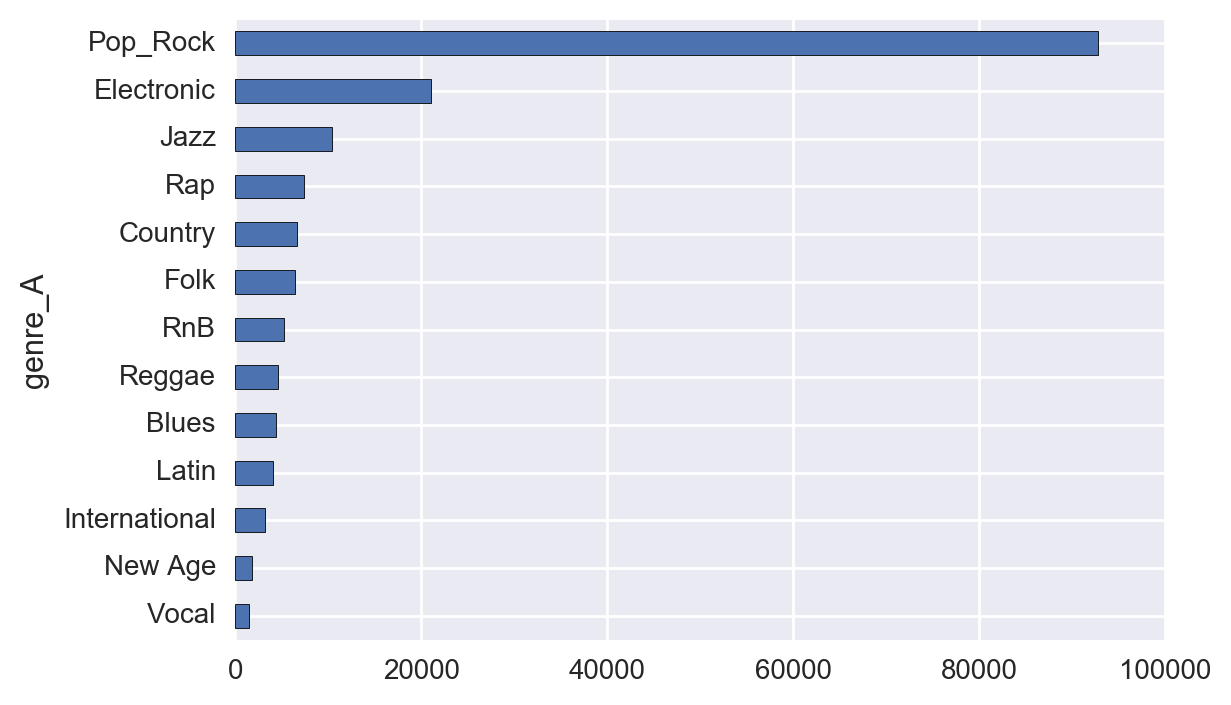

In [87]:
df_genre_og.groupby('genre_A')['genre_value'].sum().sort_values().plot(kind="barh")

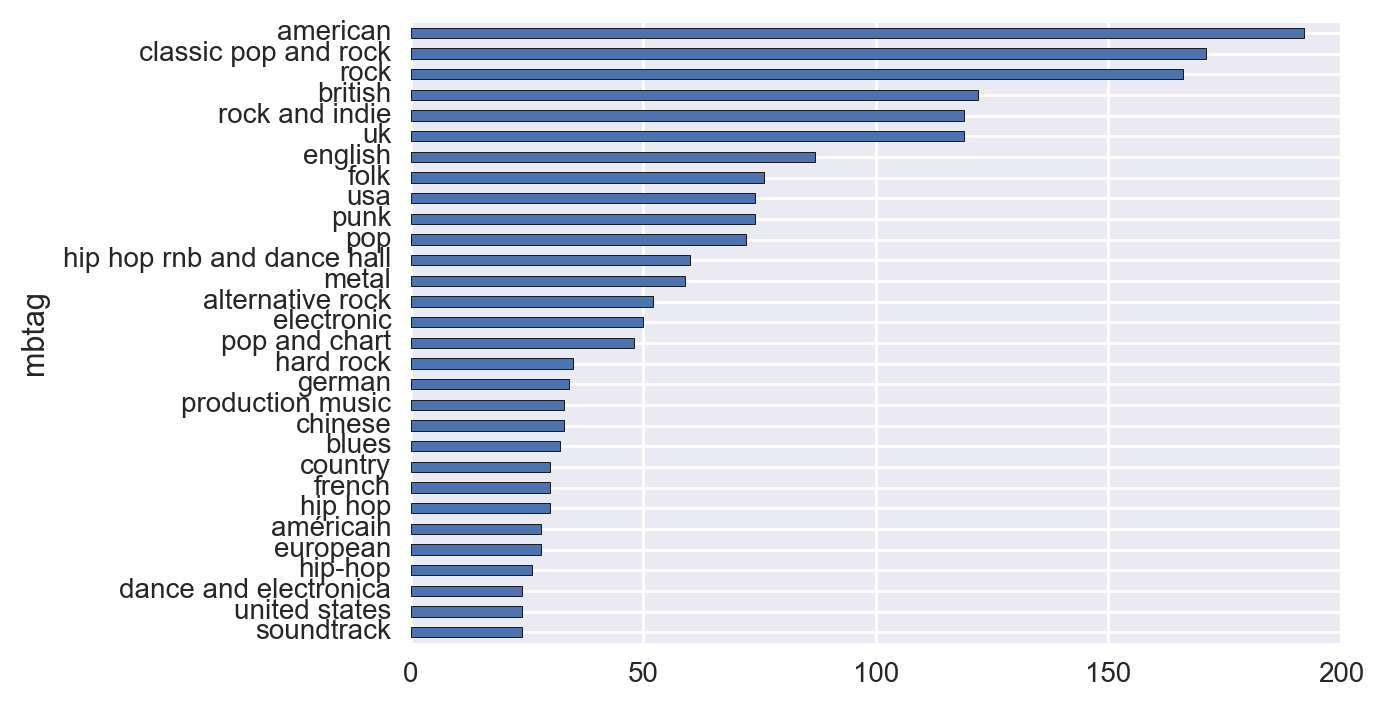

In [83]:
df_mbtag_og.groupby('mbtag')['values'].sum().sort_values(ascending=True).tail(30).plot(kind="barh")

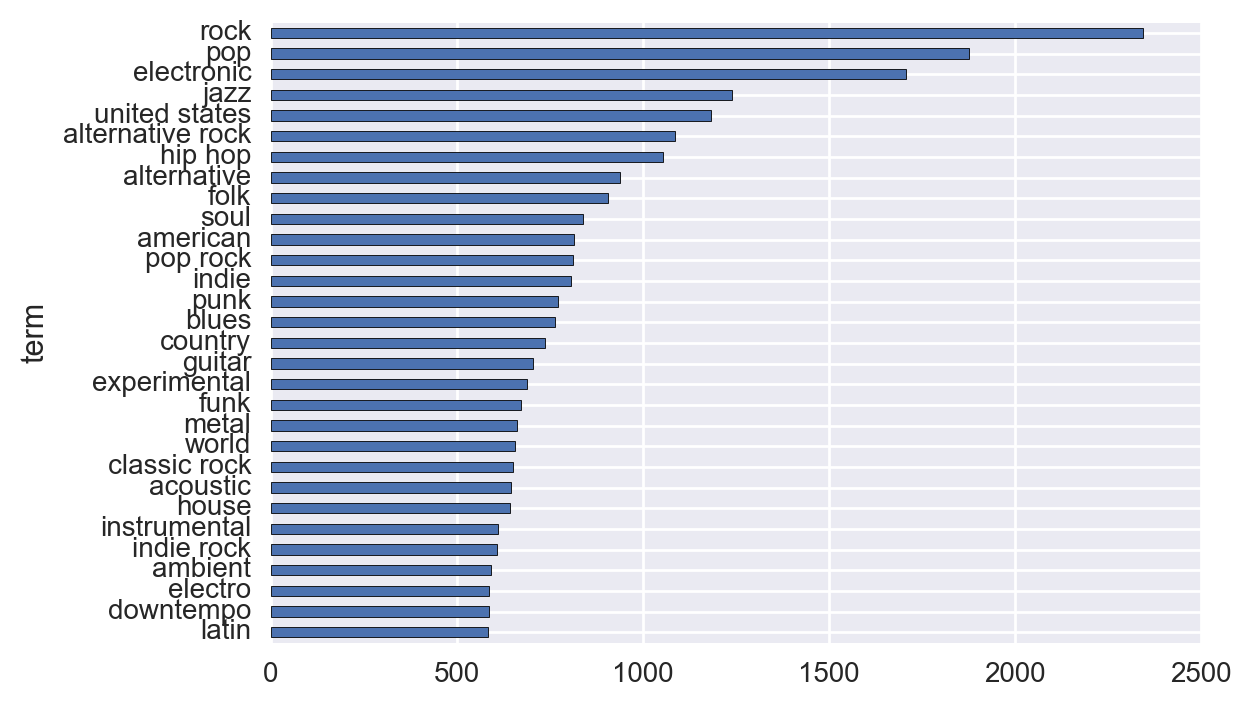

In [84]:
df_term_og.groupby('term')['values'].sum().sort_values(ascending=True).tail(30).plot(kind="barh")

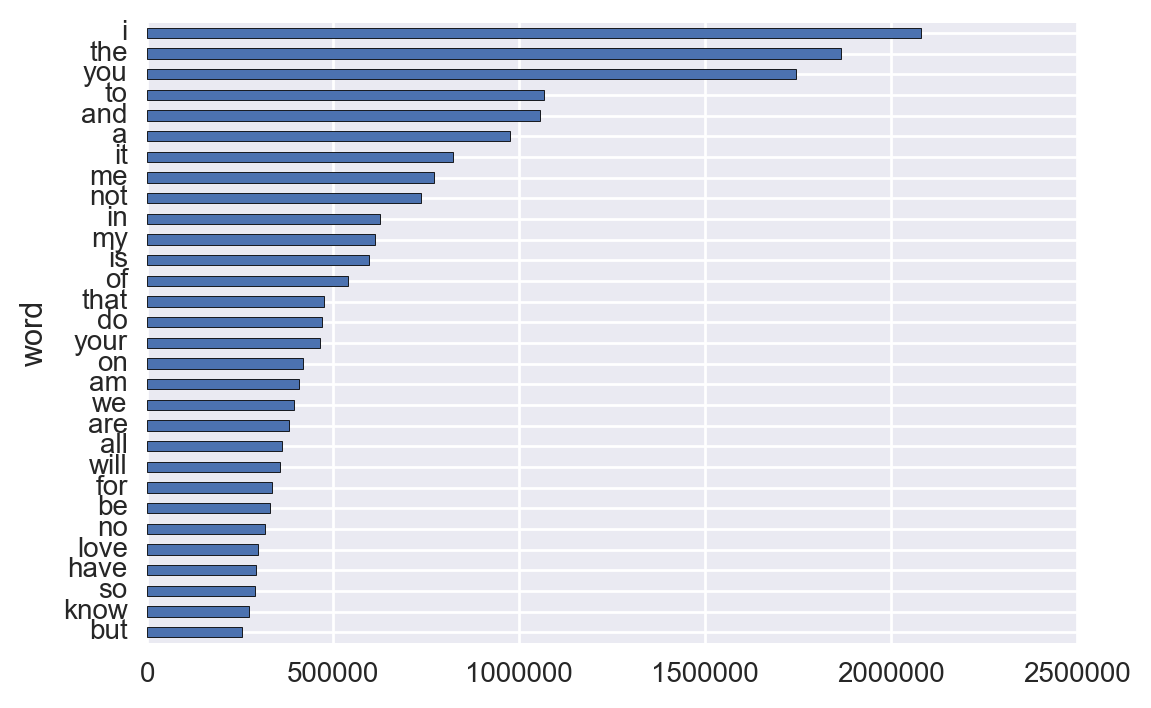

In [74]:
#Look into exploration of the lyrics dataframe
df_lyric_og.groupby('word')['count'].sum().sort_values().tail(30).plot(kind="barh")

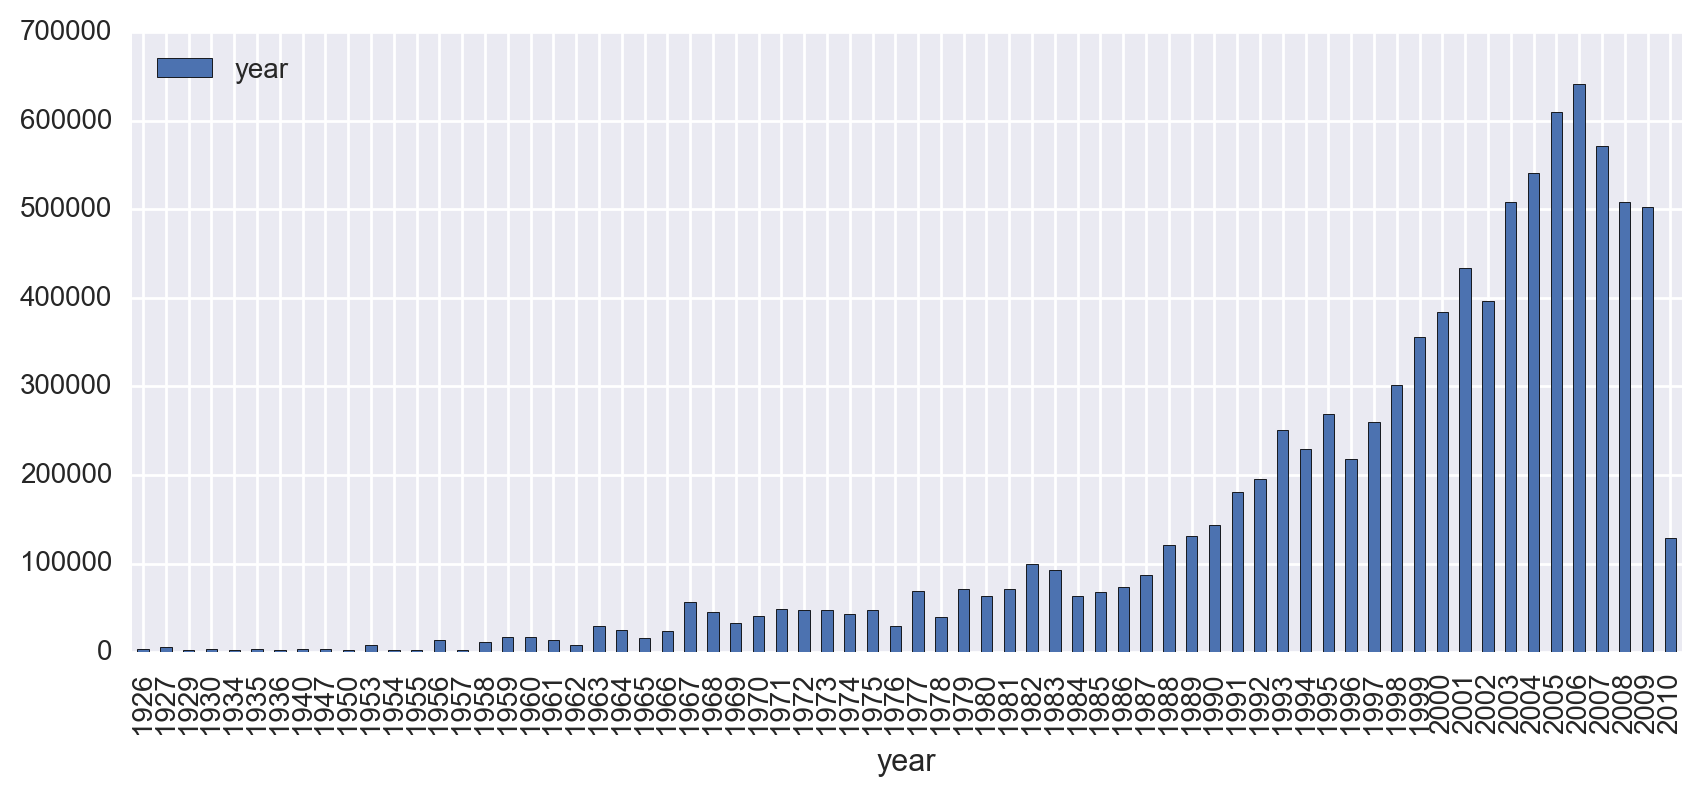

In [80]:
df_year = df_songs_og[(df_songs_og['year'] != 0)]
df_year.groupby('year').agg({'year':np.sum}).plot(kind='bar', figsize=(10,4))

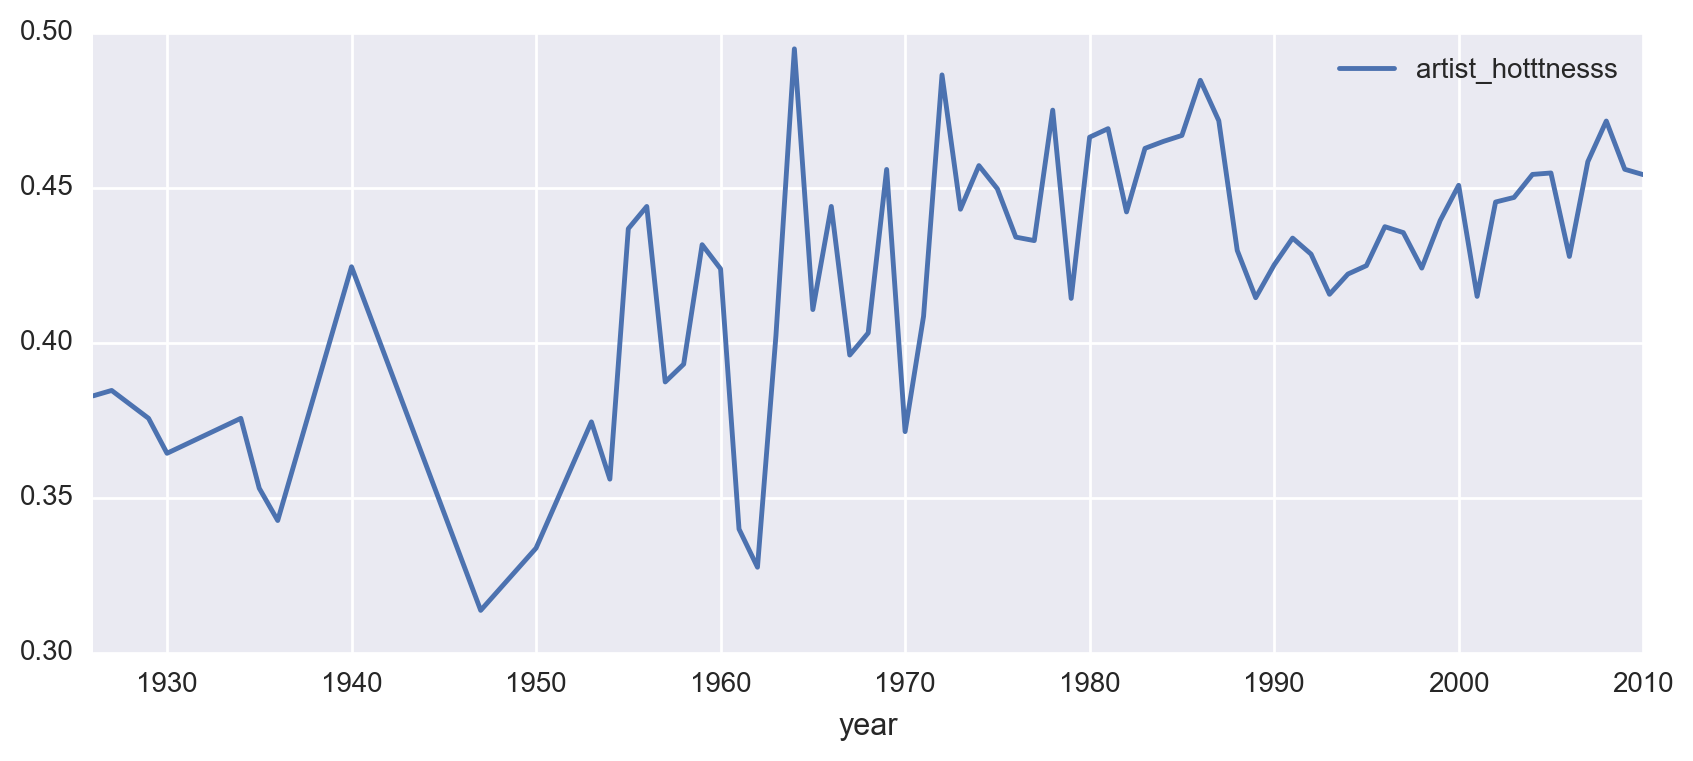

In [96]:
df_year.groupby('year').agg({'artist_hotttnesss':np.mean}).plot(kind='line', figsize=(10,4))

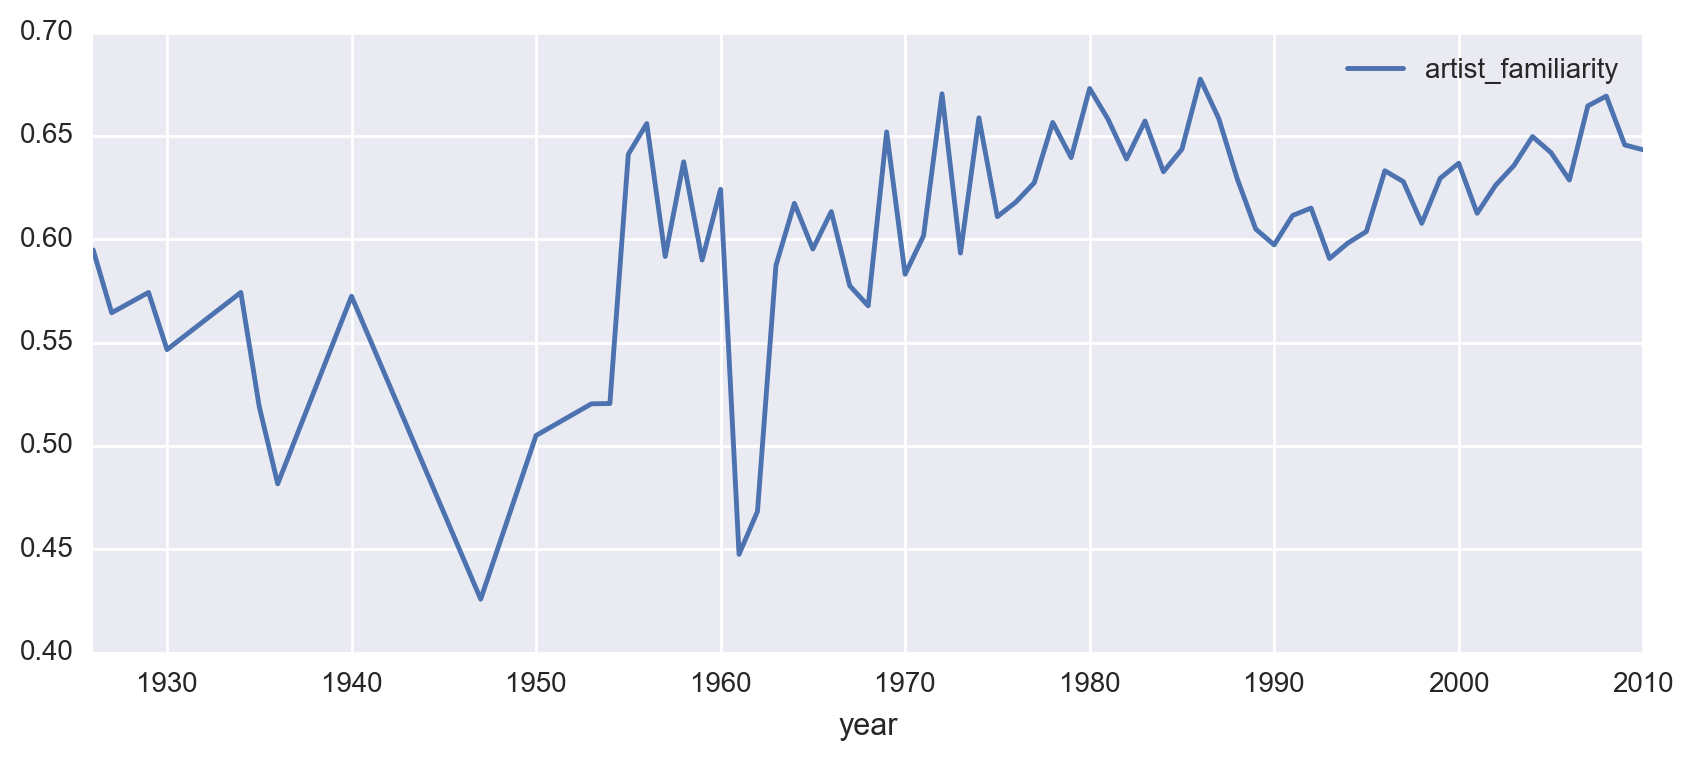

In [97]:
df_year.groupby('year').agg({'artist_familiarity':np.mean}).plot(kind='line', figsize=(10,4))

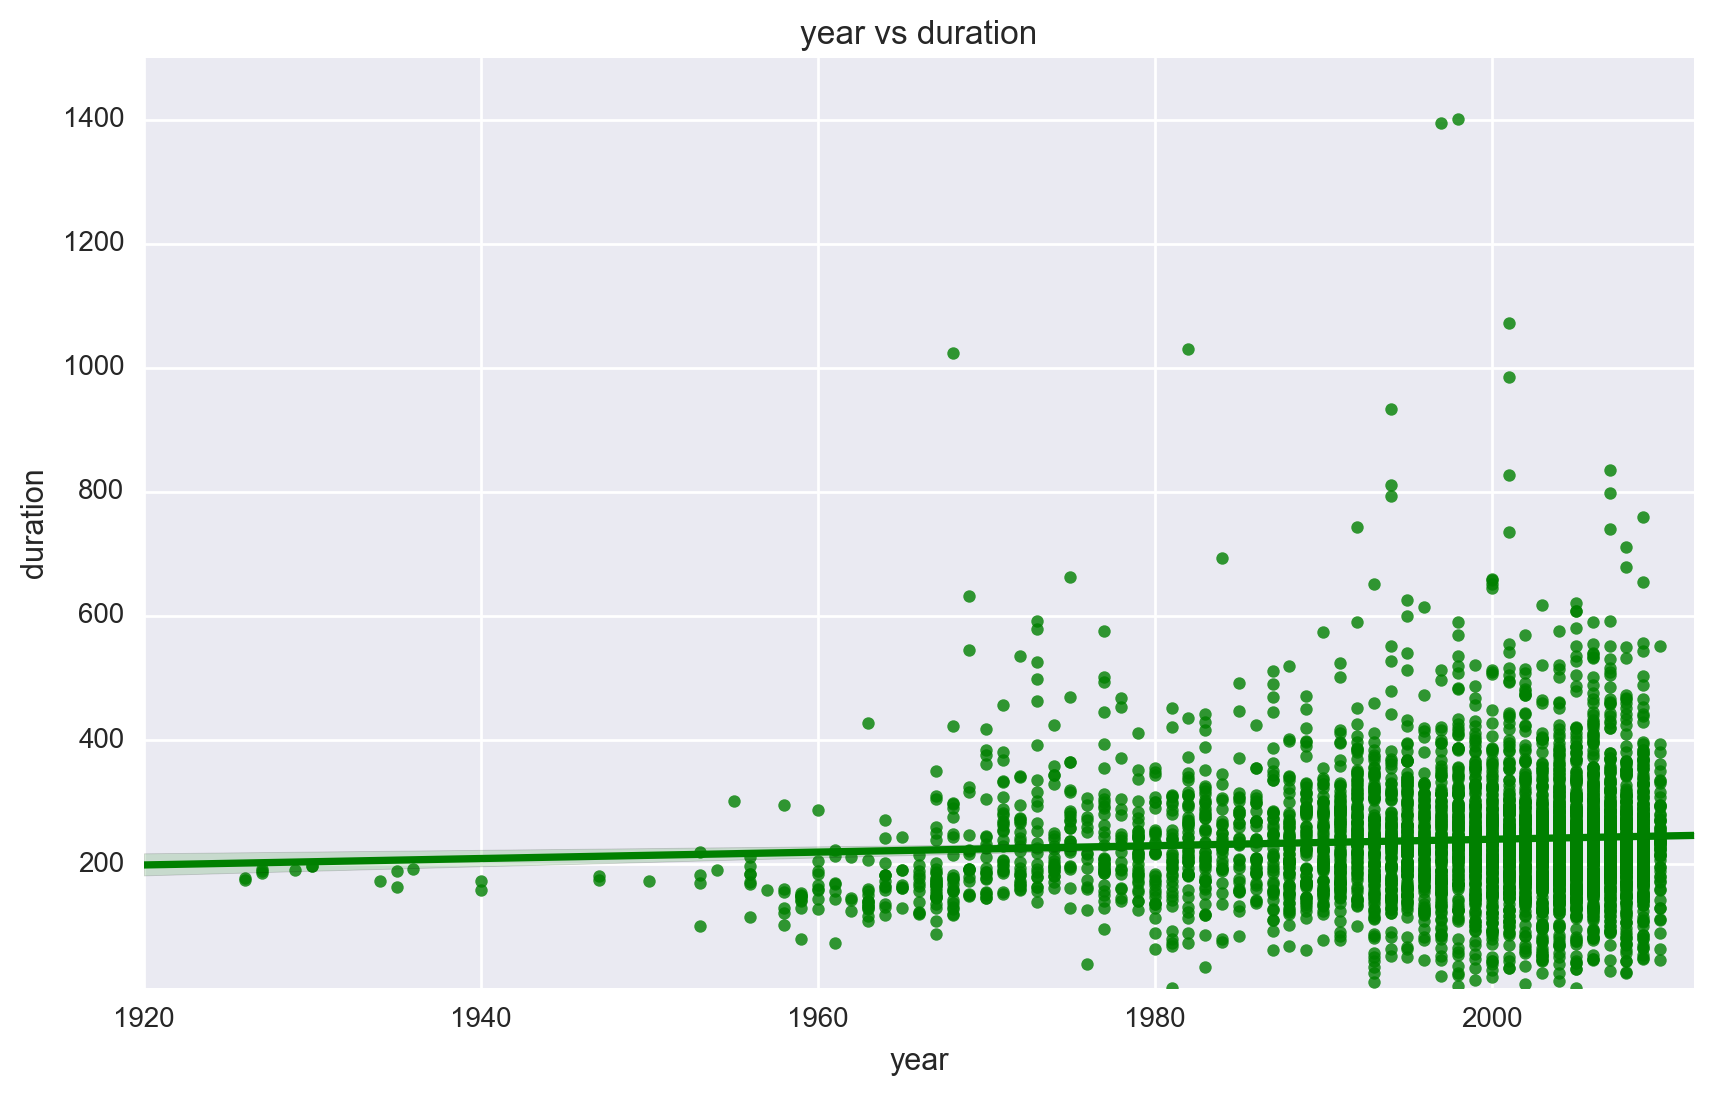

In [136]:
fig = plt.figure(figsize=(10,6))
ax = fig.gca()
ax = sns.regplot(x="year", y="duration", data=df_year, fit_reg=True, color='green')
ax.set_title('year vs duration')
ax.set_ylim([1,1500])
ax.set_xlim([1920, 2012])
plt.show()

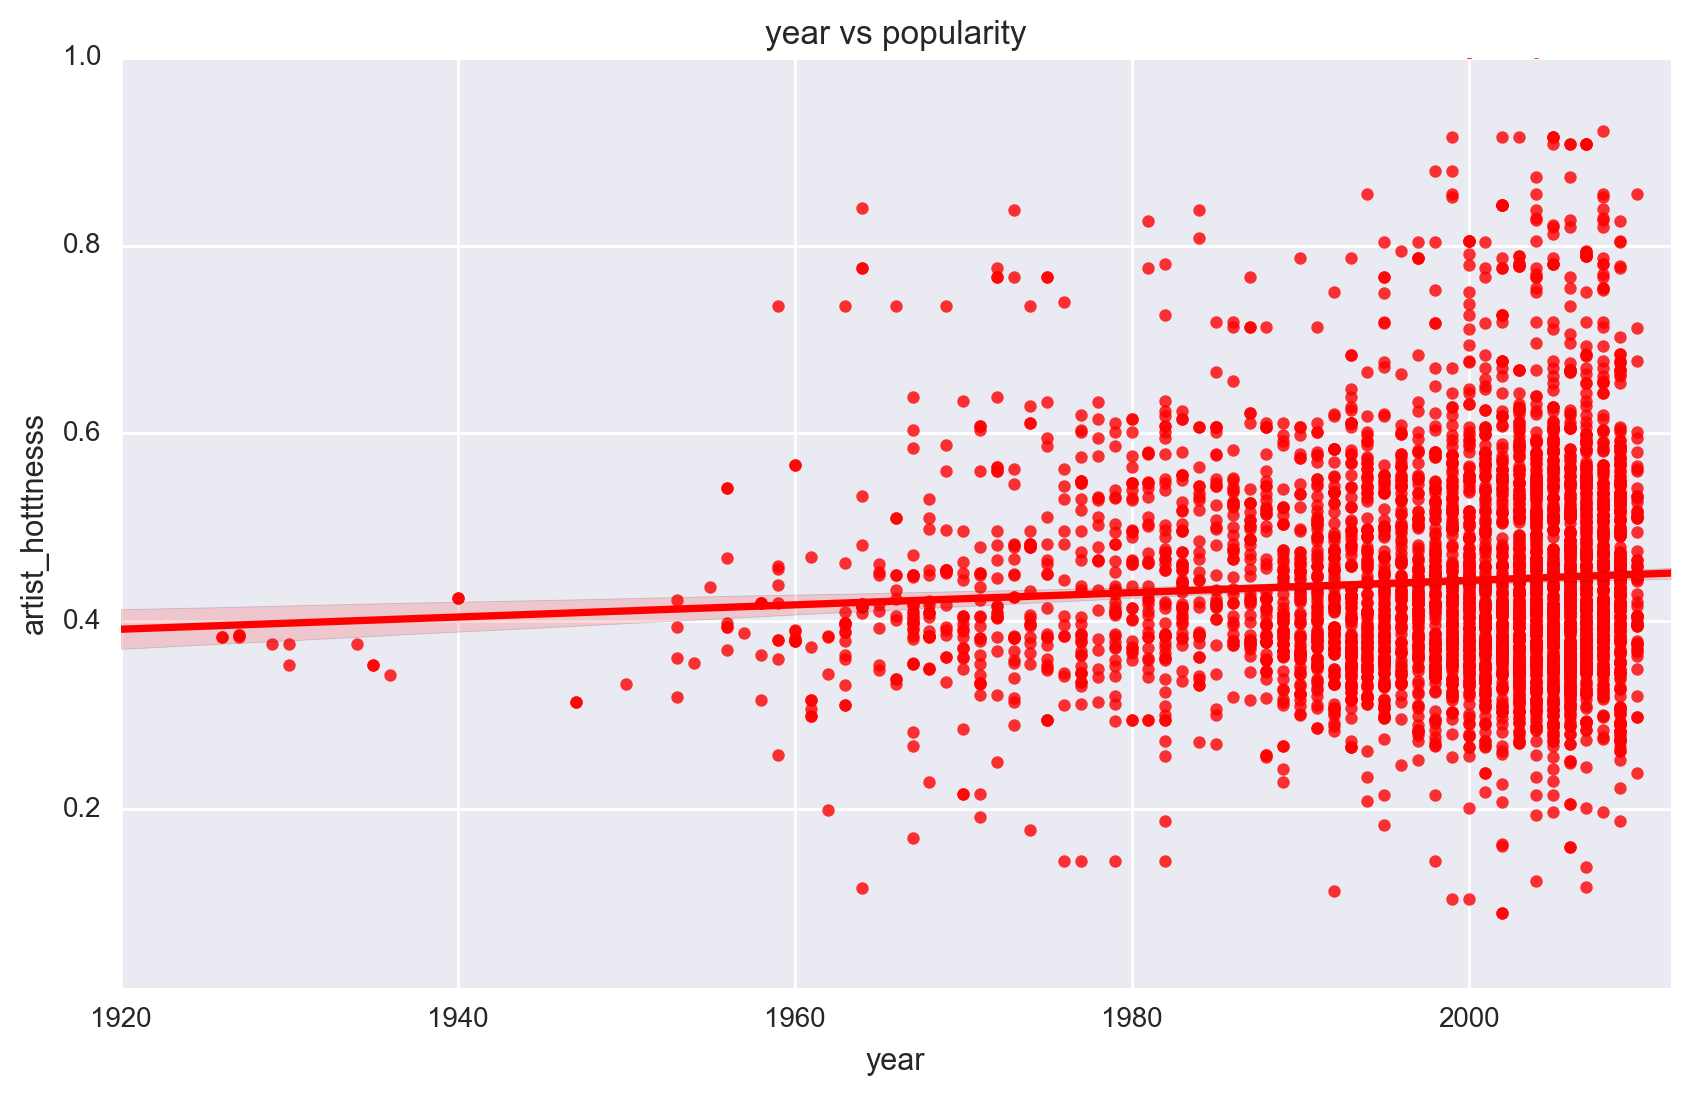

In [132]:
fig = plt.figure(figsize=(10,6))
ax = fig.gca()
ax = sns.regplot(x="year", y="artist_hotttnesss", data=df_year, fit_reg=True, color='red')
ax.set_title('year vs popularity')
ax.set_ylim([0.01,1])
ax.set_xlim([1920, 2012])
plt.show()

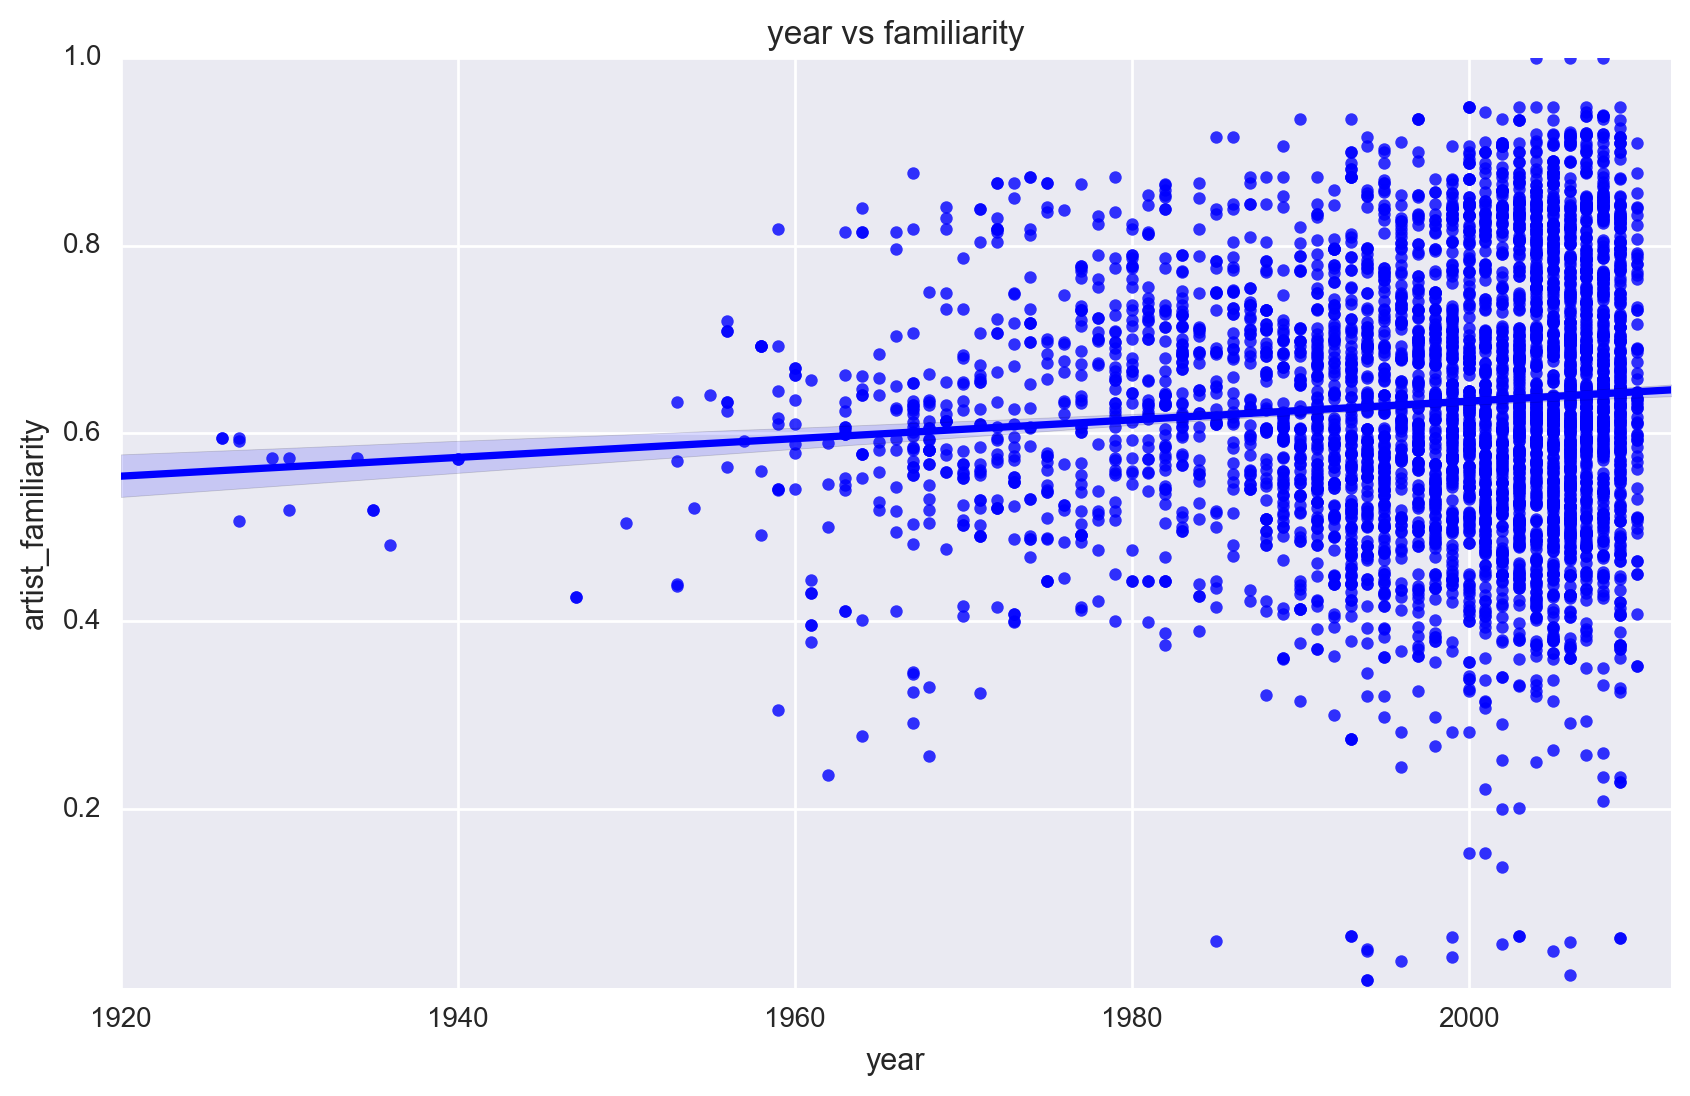

In [133]:
fig = plt.figure(figsize=(10,6))
ax = fig.gca()
ax = sns.regplot(x="year", y="artist_familiarity", data=df_year, fit_reg=True, color='blue')
ax.set_title('year vs familiarity')
ax.set_ylim([0.01,1])
ax.set_xlim([1920, 2012])
plt.show()

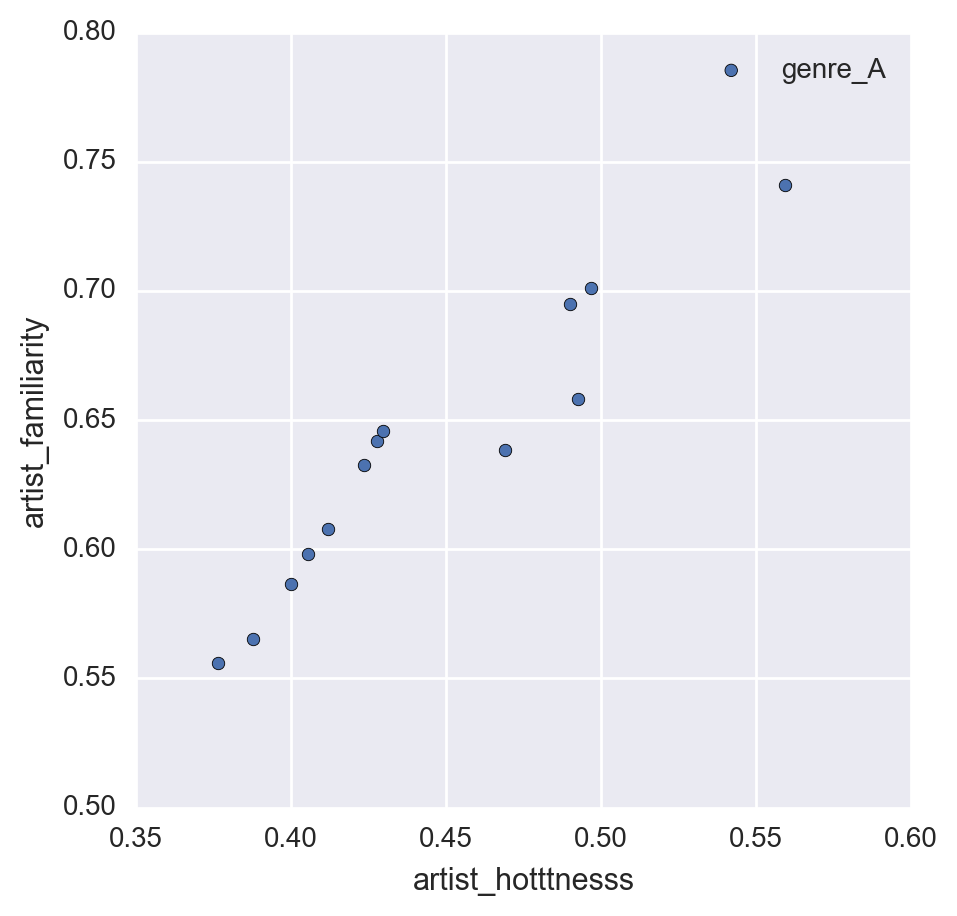

In [117]:
df_genre_scatter = df_song_and_genre.groupby('genre_A').agg({'artist_familiarity':np.mean, 'artist_hotttnesss':np.mean}).reset_index()
df_genre_scatter.plot(kind='scatter', x='artist_hotttnesss', y='artist_familiarity', figsize=(5,5), label='genre_A')

In [123]:
df_genre_scatter.sort_values(by=['artist_familiarity', 'artist_hotttnesss'], ascending=False)

,genre_A,artist_familiarity,artist_hotttnesss
11,RnB,0.740935,0.559296
8,Pop_Rock,0.701308,0.496668
9,Rap,0.695025,0.489838
12,Vocal,0.658385,0.492692
6,Latin,0.645764,0.429592
2,Electronic,0.641779,0.427700
1,Country,0.638563,0.468865
10,Reggae,0.632654,0.423631
3,Folk,0.607850,0.411926
5,Jazz,0.598322,0.405501


In [124]:
df_genre_scatter.describe()

,artist_familiarity,artist_hotttnesss
count,13.000000,13.000000
mean,0.636018,0.443834
std,0.054385,0.053407
min,0.555871,0.376411
25%,0.598322,0.405501
50%,0.638563,0.427700
75%,0.658385,0.489838
max,0.740935,0.559296


In [264]:
#Figuring out popularity and familiarity logistic scores from mean and std
df_tags_comb.describe()

,duration,artist_familiarity,artist_hotttnesss,year,mbtag_00s,mbtag_60s,mbtag_acid_rock,mbtag_adult_contemporary,mbtag_alternative_dance,mbtag_alternative_hip-hop,...,term_taiwan,term_technical,term_traditional_folk,term_traditional_pop,term_twee_pop,term_uk,term_virtuoso,term_vocal_house,term_western,term_zouk
count,2562.000000,2562.000000,2562.000000,2562.000000,2562.000000,2562.000000,2562.000000,2562.000000,2562.000000,2562.000000,...,2562.000000,2562.000000,2562.000000,2562.000000,2562.000000,2562.000000,2562.000000,2562.000000,2562.000000,2562.000000
mean,241.677521,0.693674,0.496323,1996.384856,0.008587,0.002732,0.004294,0.006245,0.002732,0.005464,...,0.002342,0.014832,0.004294,0.004684,0.007416,0.011319,0.005855,0.006245,0.004294,0.001171
std,102.444522,0.123950,0.124897,12.025915,0.092286,0.052210,0.065397,0.078794,0.052210,0.073734,...,0.048346,0.120904,0.065397,0.068291,0.085814,0.105809,0.076307,0.078794,0.065397,0.034206
min,1.044440,0.023504,0.000000,1926.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,183.548933,0.609124,0.406097,1991.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,231.117915,0.693009,0.475941,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,281.338320,0.791762,0.555415,2005.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1598.197100,1.000000,1.082503,2010.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Lyric EDA

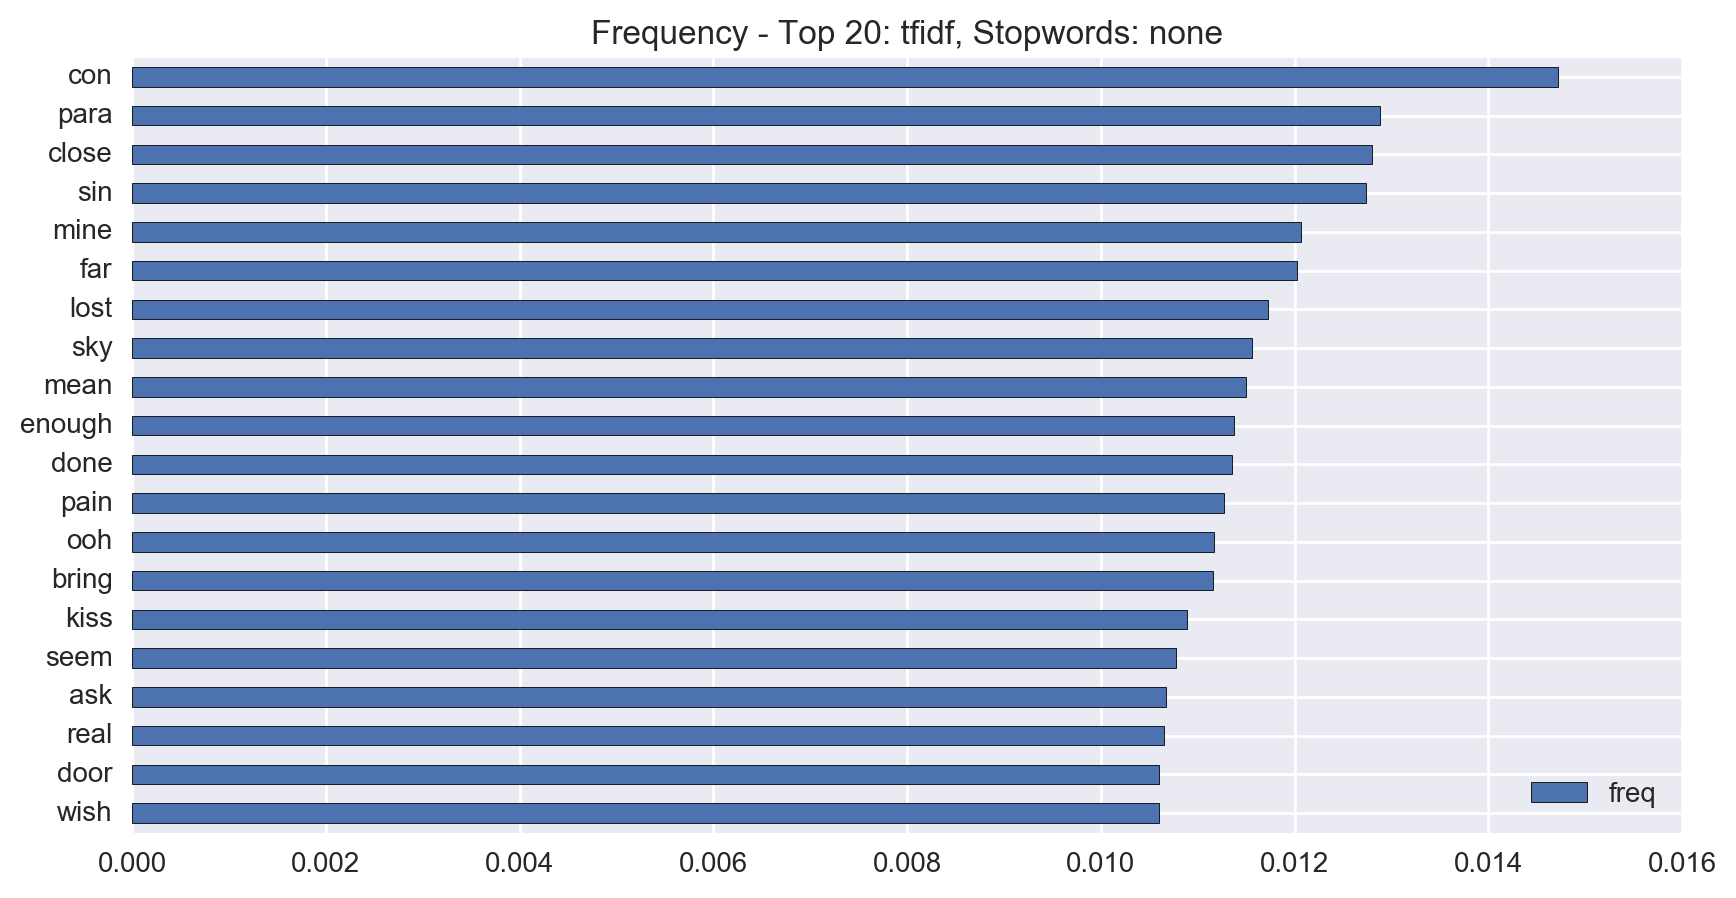

In [418]:
tf_df_tfidf.sort_values("freq").tail(20).plot(kind="barh", title=title, figsize=(10,5))

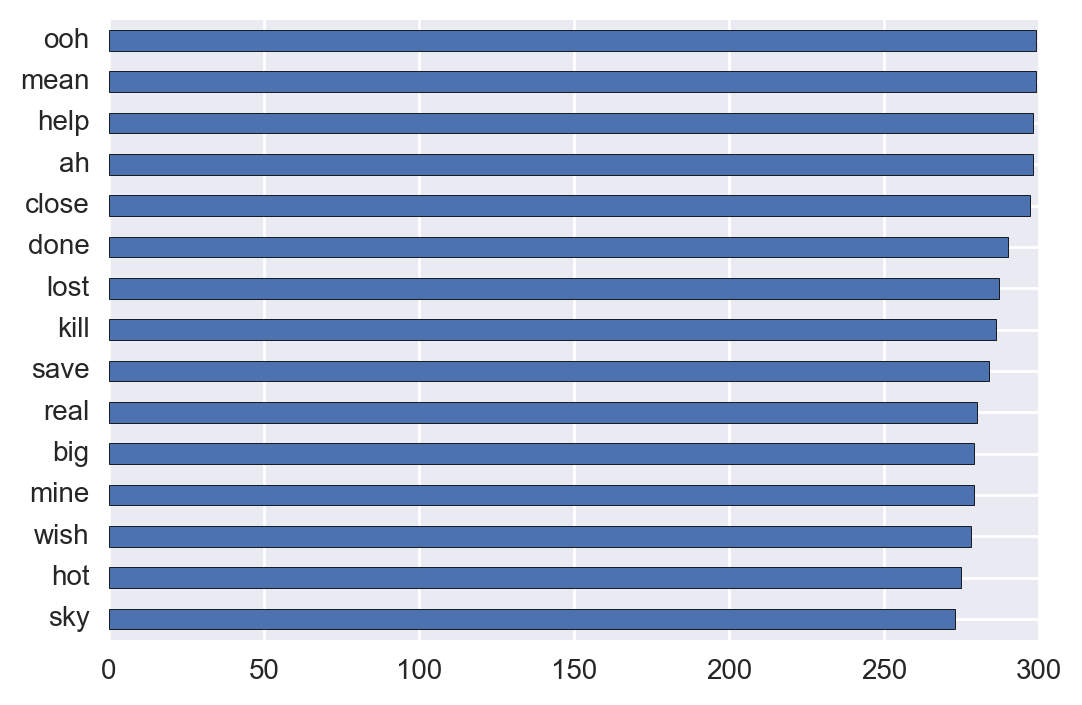

In [424]:
#Count
df_words[df_words.columns].sum().sort_values(ascending=True).tail(15).plot(kind='barh')

In [435]:
df_words.head()

,across,act,action,afraid,age,ago,ah,ahead,air,alma,...,wrap,write,ye,yea,yellow,yesterday,yet,young,popularity,familiarity
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 6. Modeling


# Overall Viewpoint

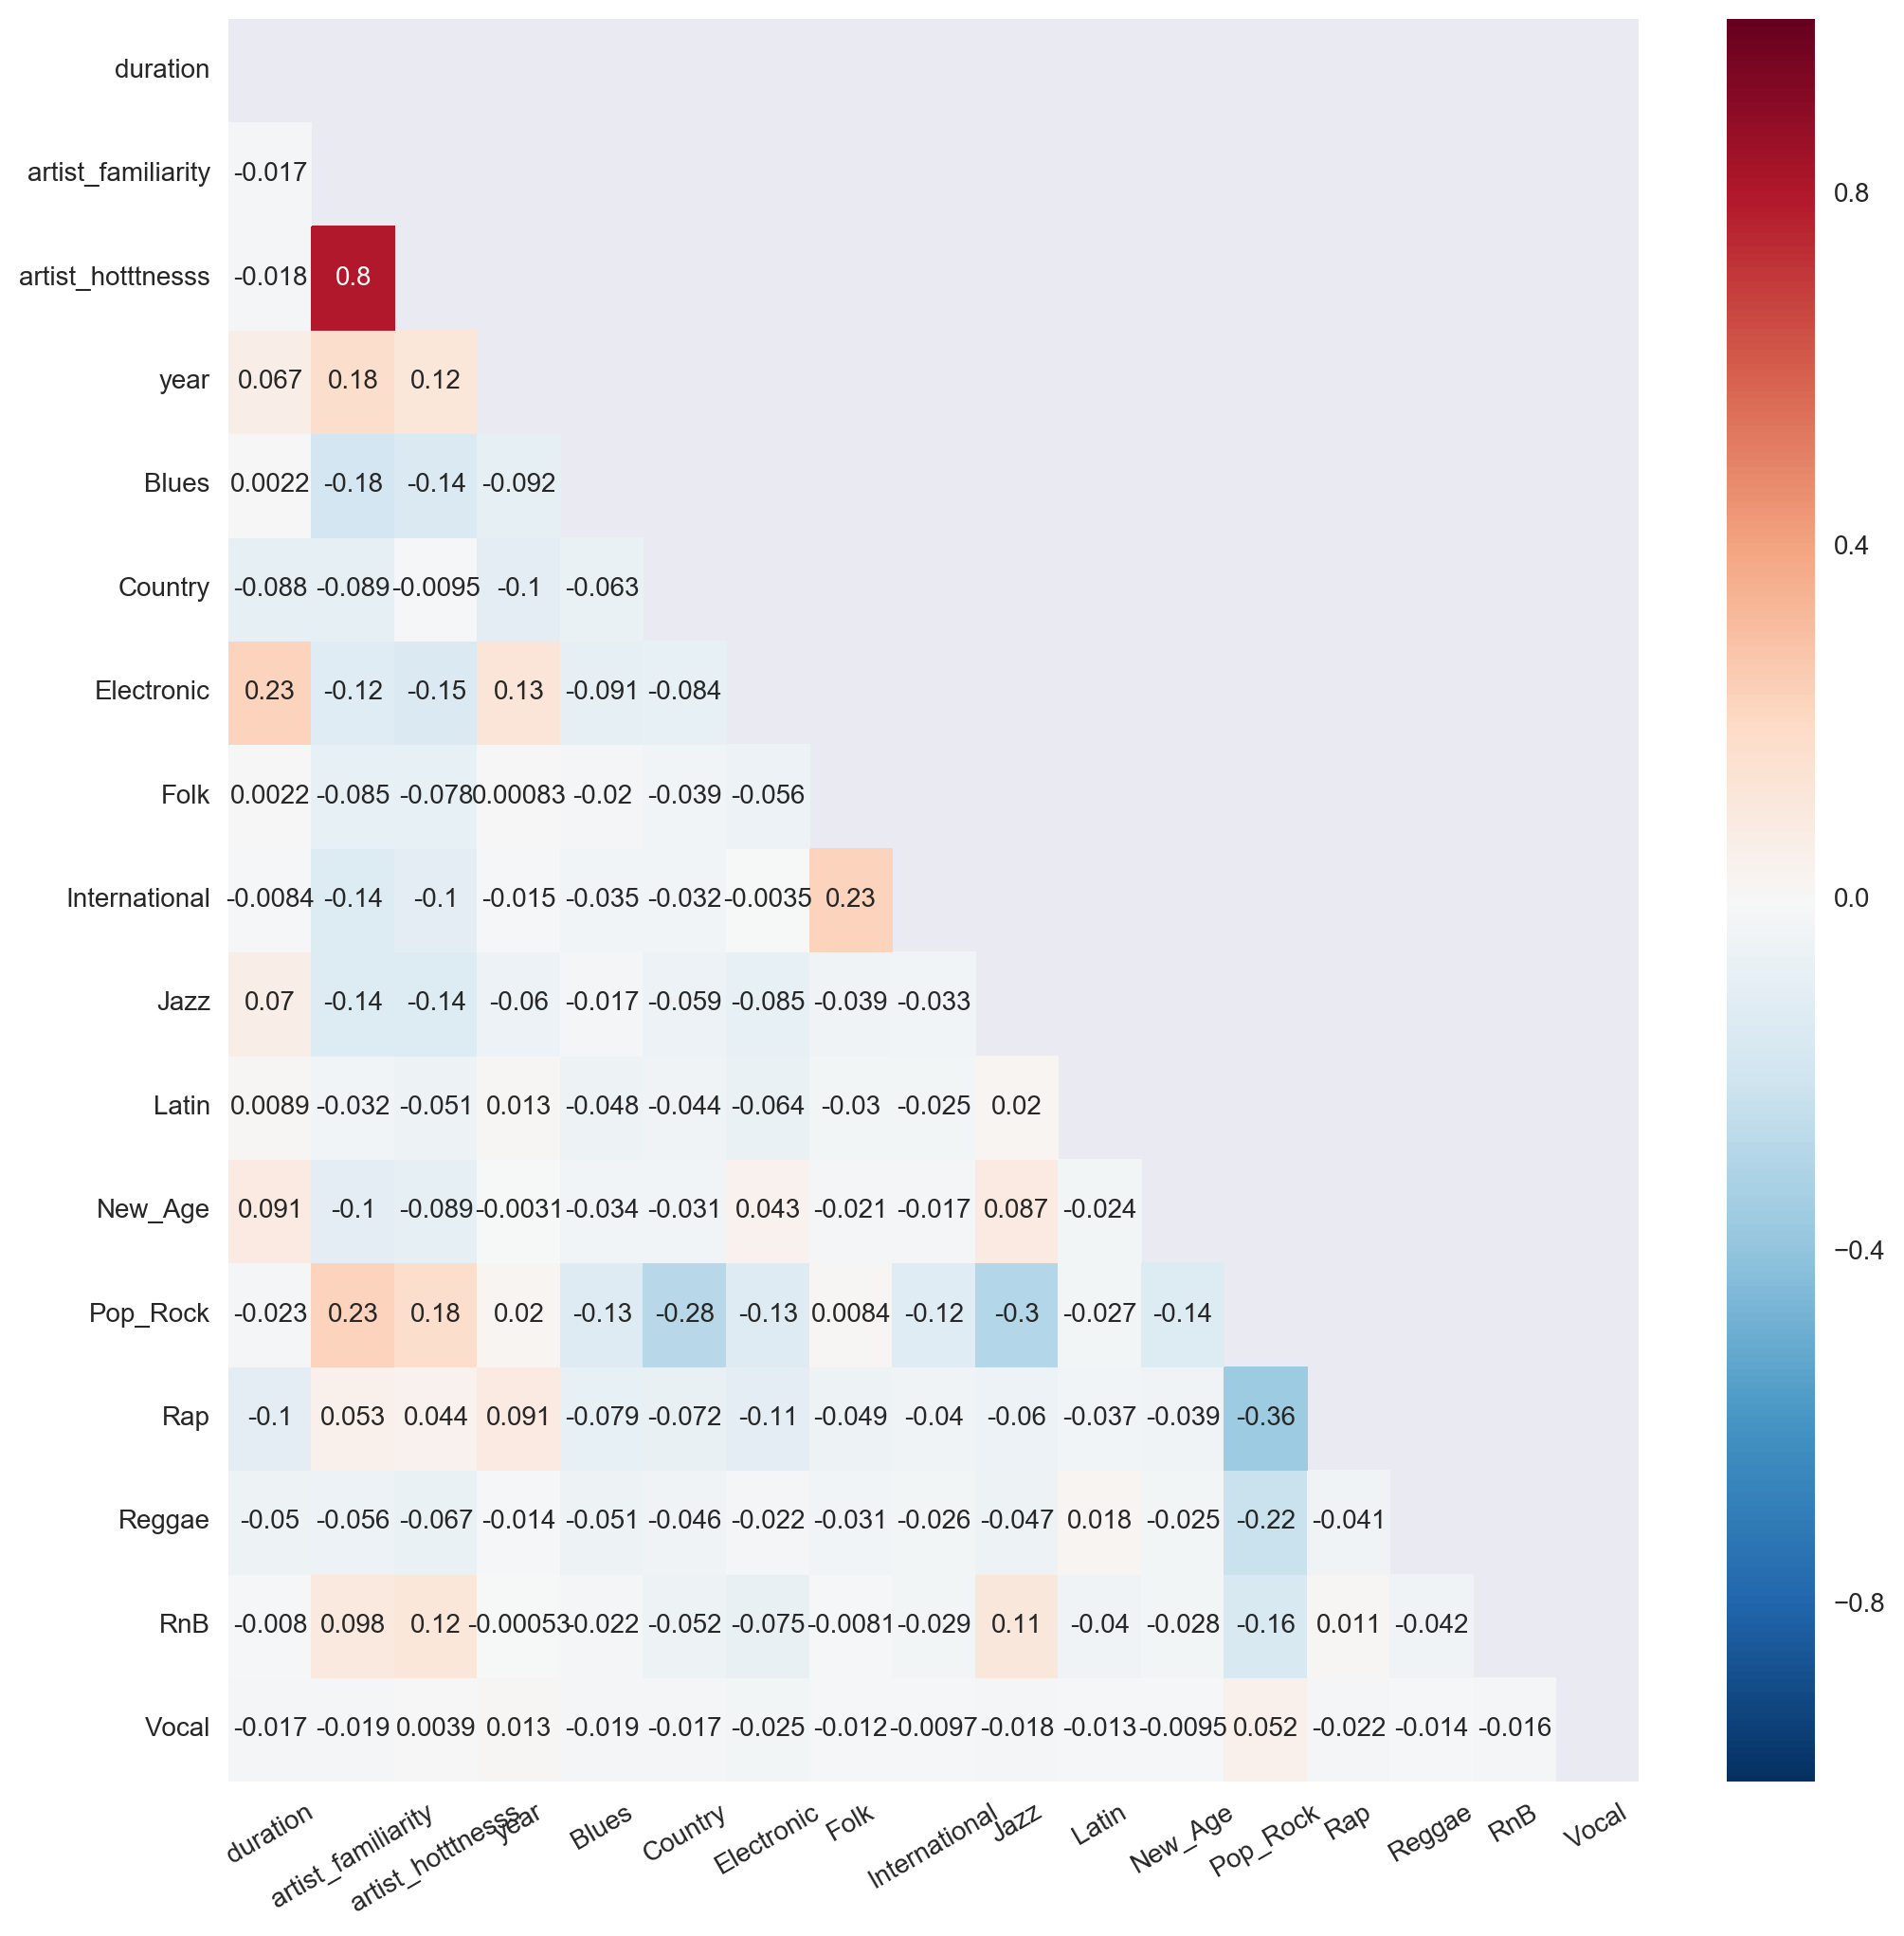

In [457]:
correlation_heat_map(df_genre_comb_corr)

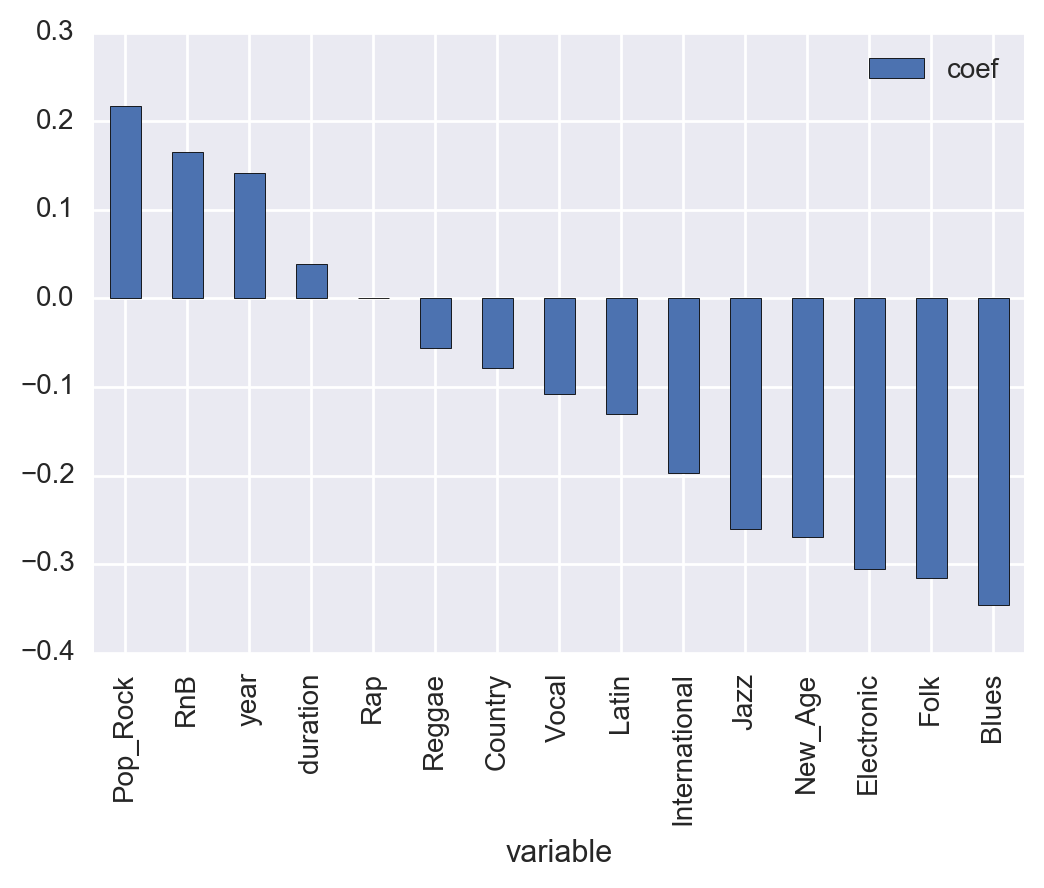

In [242]:
coefs.plot(kind='bar', x='variable', y='coef')

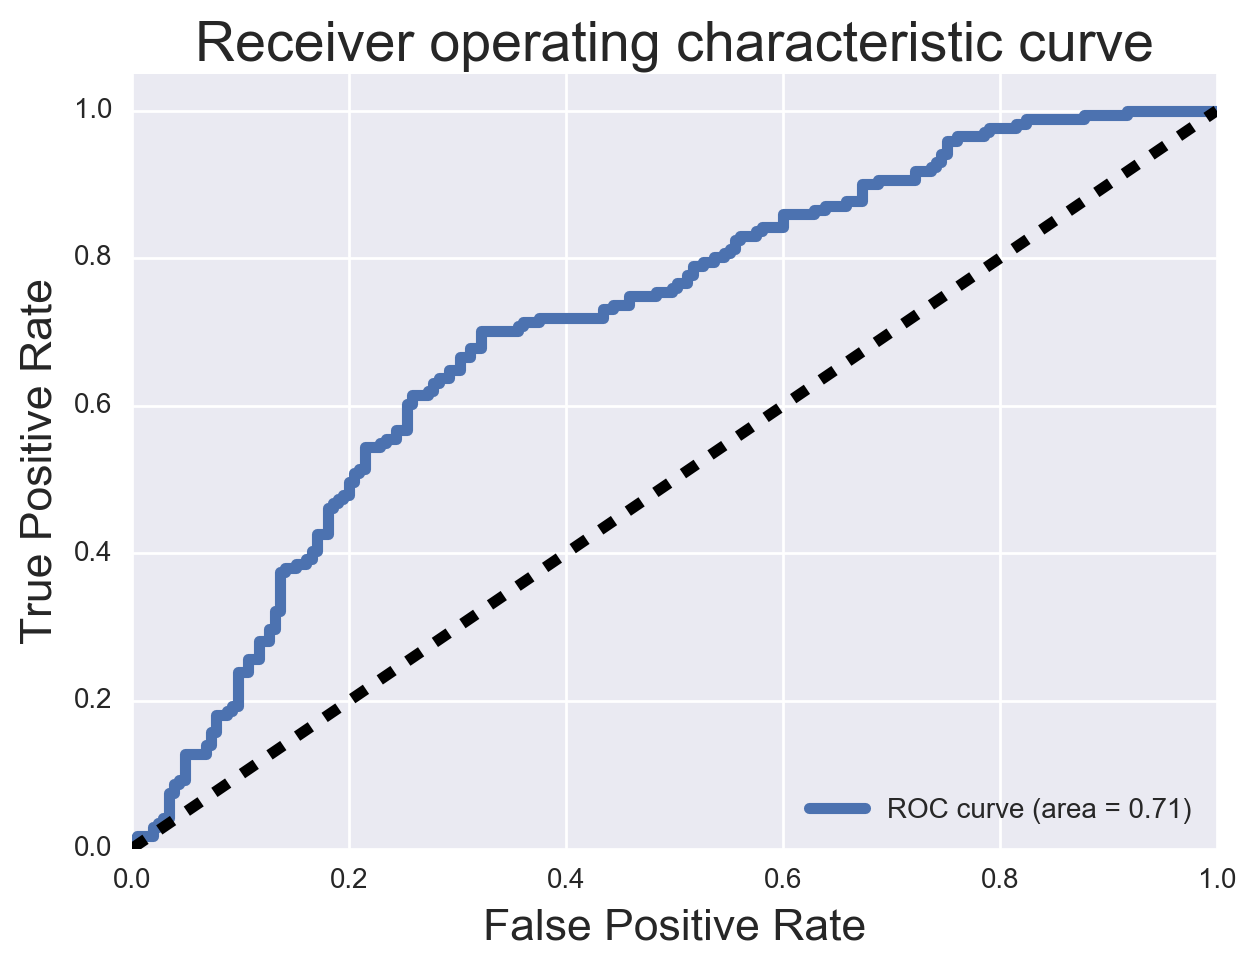

In [352]:
# Get out the predicted probabilities for the X observation matrix
y_pp = lrcv_pop.predict_proba(X_test_pop)

# roc_curve returns the false positive rate and true positive rates as the threshold changes
# takes in the y and the predicted probabilities of the positive class from your model.
fpr, tpr, _ = roc_curve(y_test_pop, y_pp[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[7,5])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver operating characteristic curve', fontsize=20)
plt.legend(loc="lower right")
plt.show()

# Overall Genre Familiarity

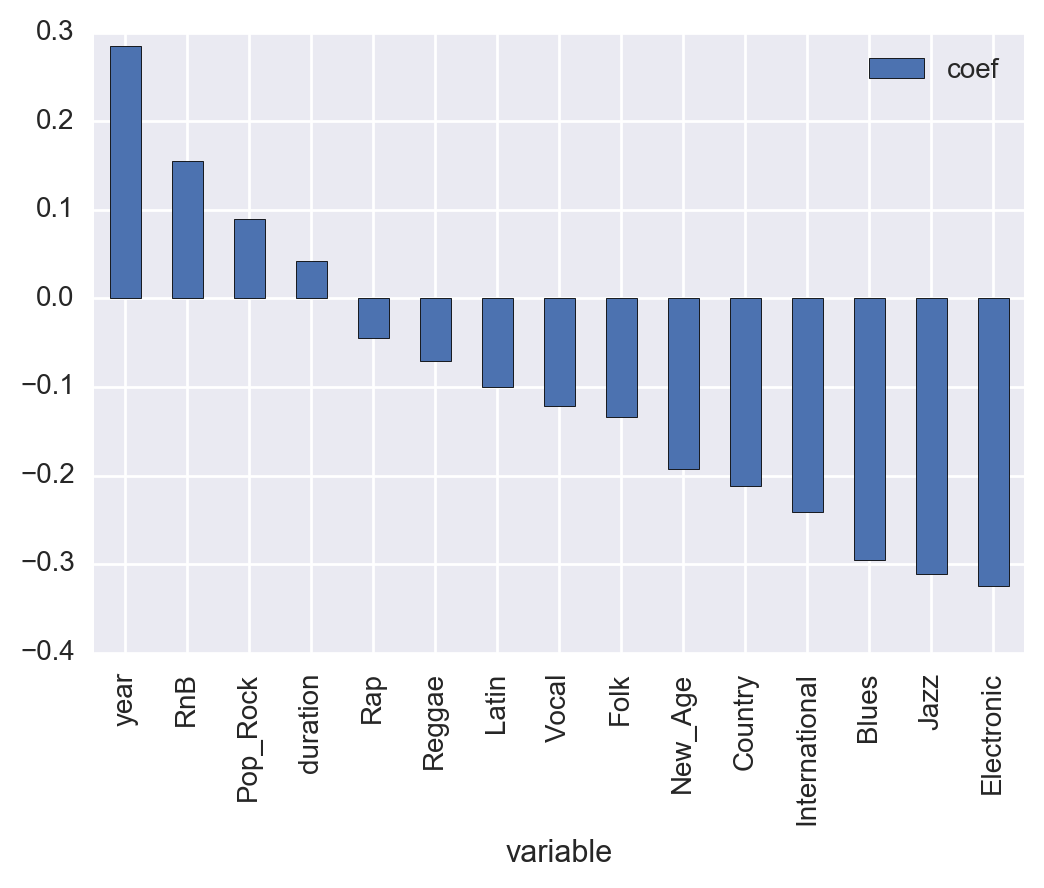

In [241]:
coefs_fam.plot(kind='bar', x='variable', y='coef')

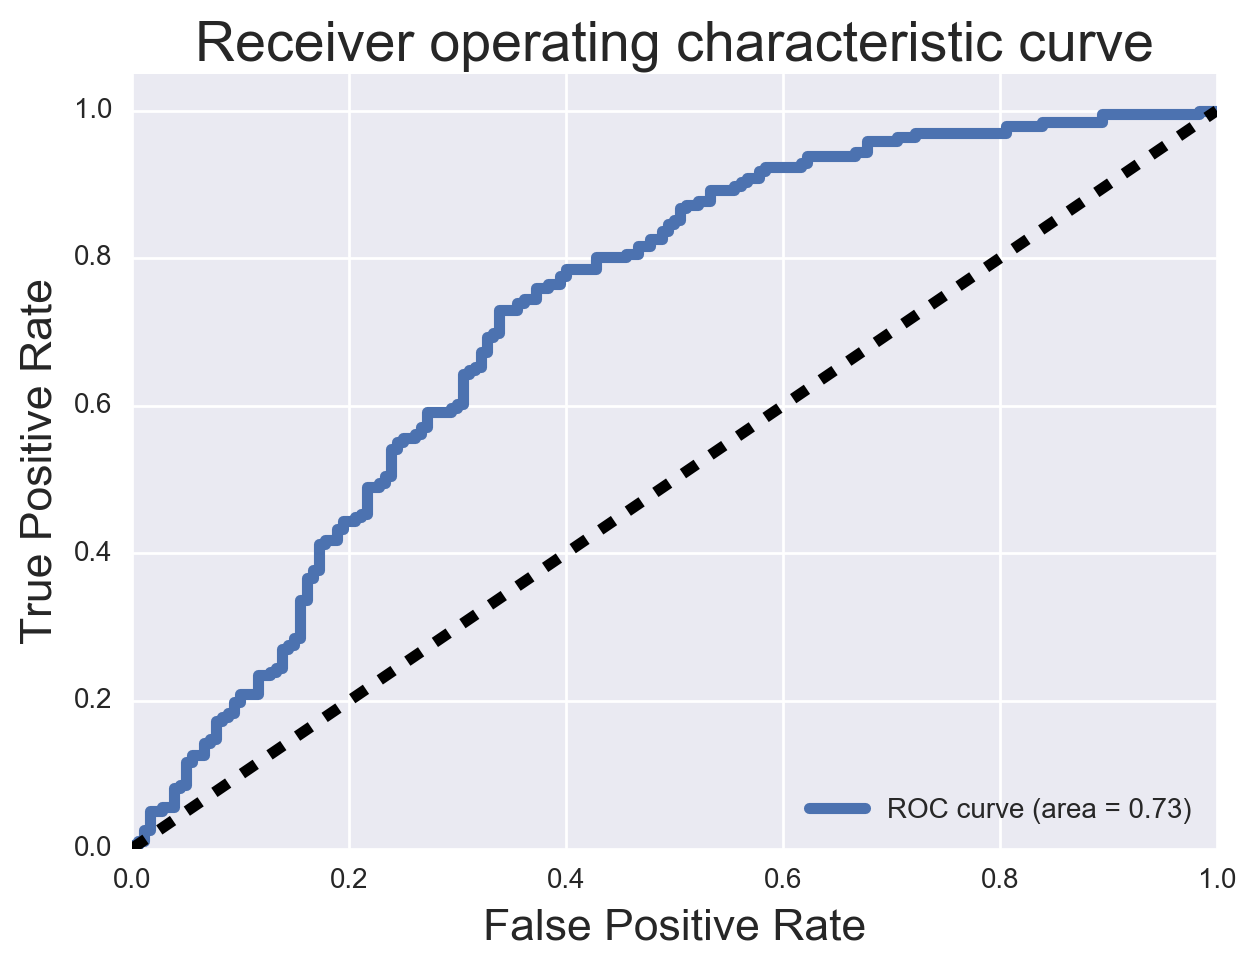

In [351]:
# Get out the predicted probabilities for the X observation matrix
y_pp = lrcv_fam.predict_proba(X_test_fam)

# roc_curve returns the false positive rate and true positive rates as the threshold changes
# takes in the y and the predicted probabilities of the positive class from your model.
fpr, tpr, _ = roc_curve(y_test_fam, y_pp[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[7,5])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver operating characteristic curve', fontsize=20)
plt.legend(loc="lower right")
plt.show()

# Top Tags for Combined genre data set

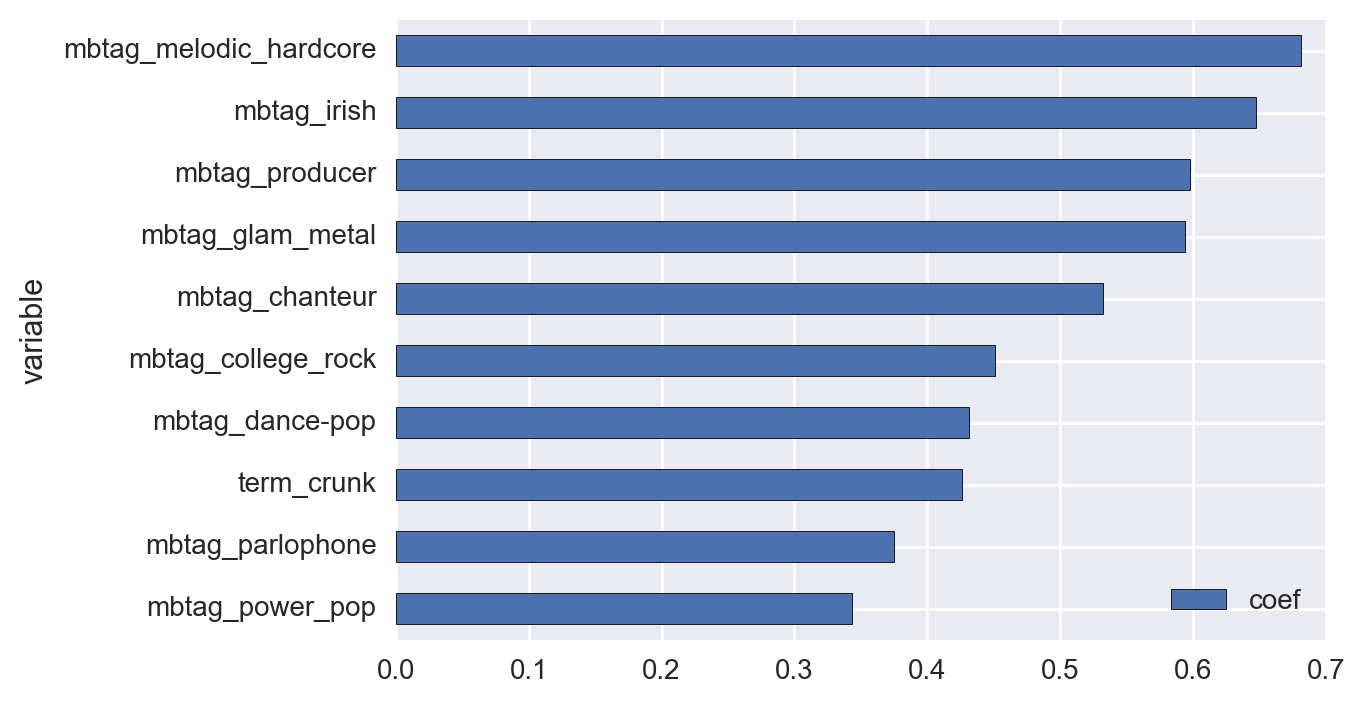

In [483]:
coefs_tag_pop.head(10).sort_values('coef', ascending=True).plot(kind='barh', x='variable', y='coef')

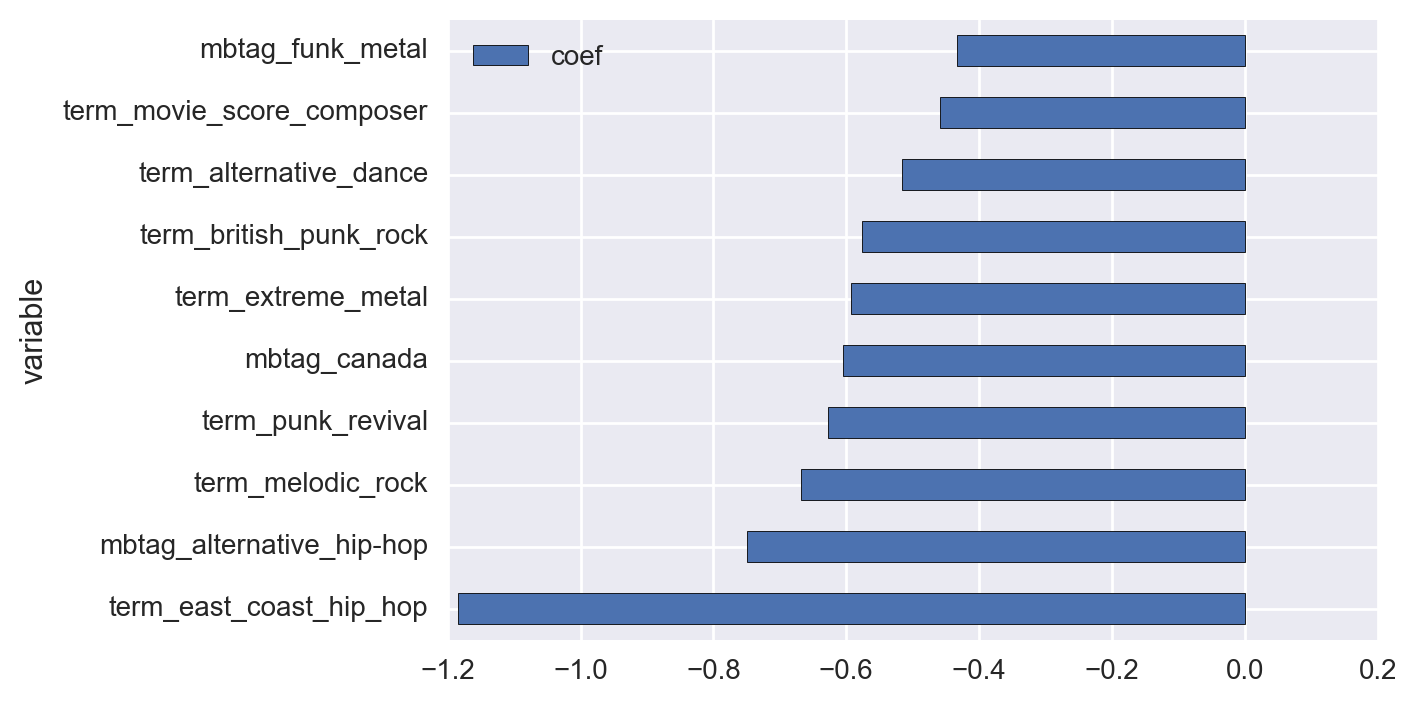

In [484]:
coefs_tag_pop.tail(10).sort_values('coef', ascending=True).plot(kind='barh', x='variable', y='coef')

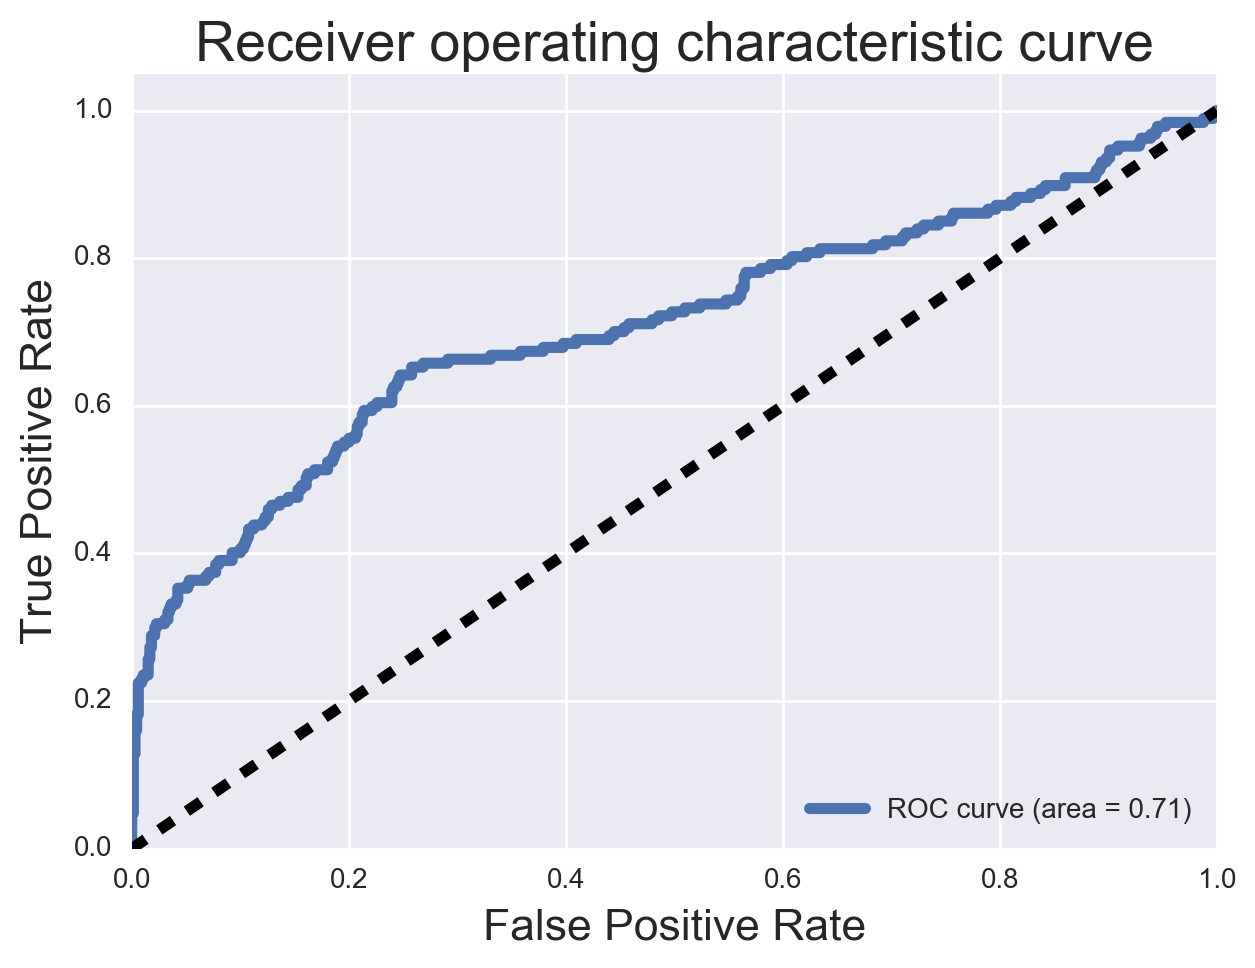

In [348]:
from sklearn.metrics import roc_curve, auc

# Get out the predicted probabilities for the X observation matrix
y_pp = lrcv_tag_pop.predict_proba(X_test)

# roc_curve returns the false positive rate and true positive rates as the threshold changes
# takes in the y and the predicted probabilities of the positive class from your model.
fpr, tpr, _ = roc_curve(y_test, y_pp[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[7,5])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver operating characteristic curve', fontsize=20)
plt.legend(loc="lower right")
plt.show()

# Tags Familiarity

In [293]:
coefs_tag_fam.head()

,abs_coef,coef,variable
55,5.021099,5.021099,mbtag_garage_rock
84,4.464803,4.464803,mbtag_nu_metal
82,3.766270,3.766270,mbtag_new_metal
90,3.372946,3.372946,mbtag_post-grunge
77,3.166682,3.166682,mbtag_melodic_hardcore


In [294]:
coefs_tag_fam.tail()

,abs_coef,coef,variable
207,1.494282,-1.494282,term_western
184,1.859489,-1.859489,term_quiet_storm
135,1.928015,-1.928015,term_digital_hardcore
123,2.547047,-2.547047,term_british_punk_rock
11,2.882350,-2.882350,mbtag_australian


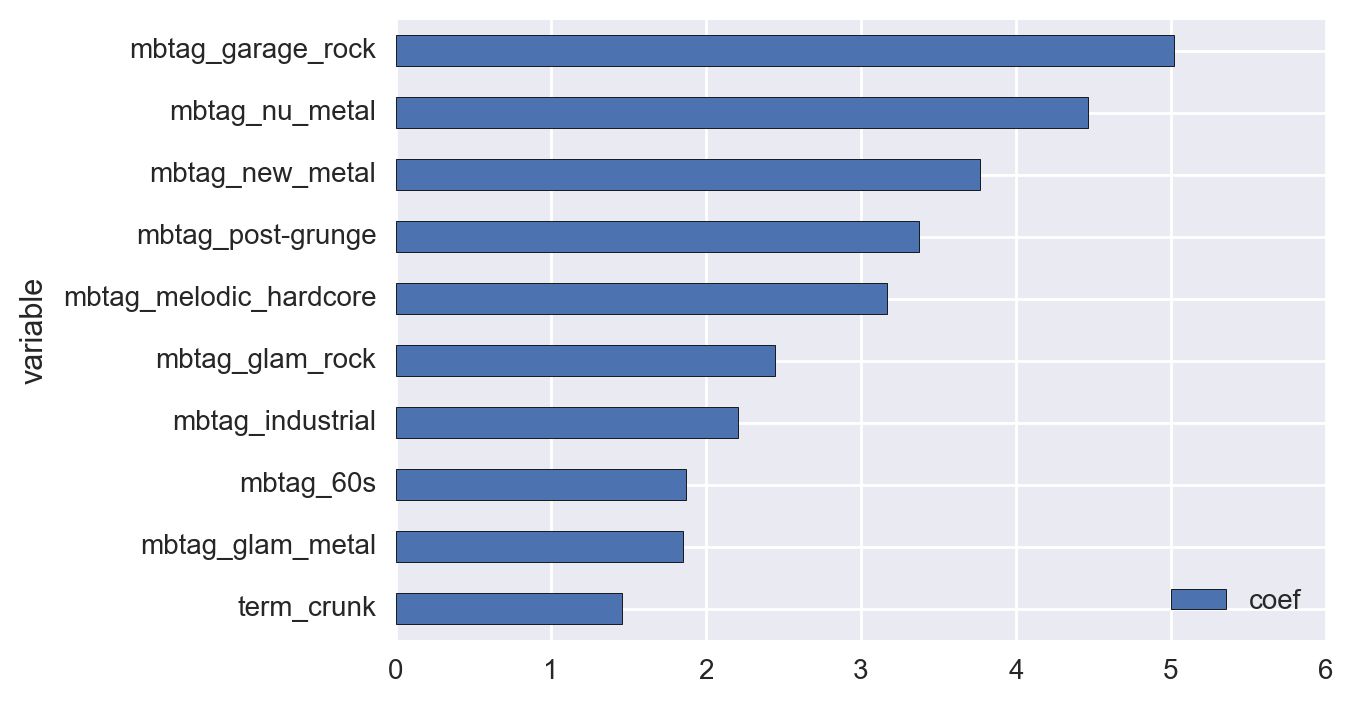

In [481]:
coefs_tag_fam.head(10).sort_values('coef', ascending=True).plot(kind='barh', x='variable', y='coef')

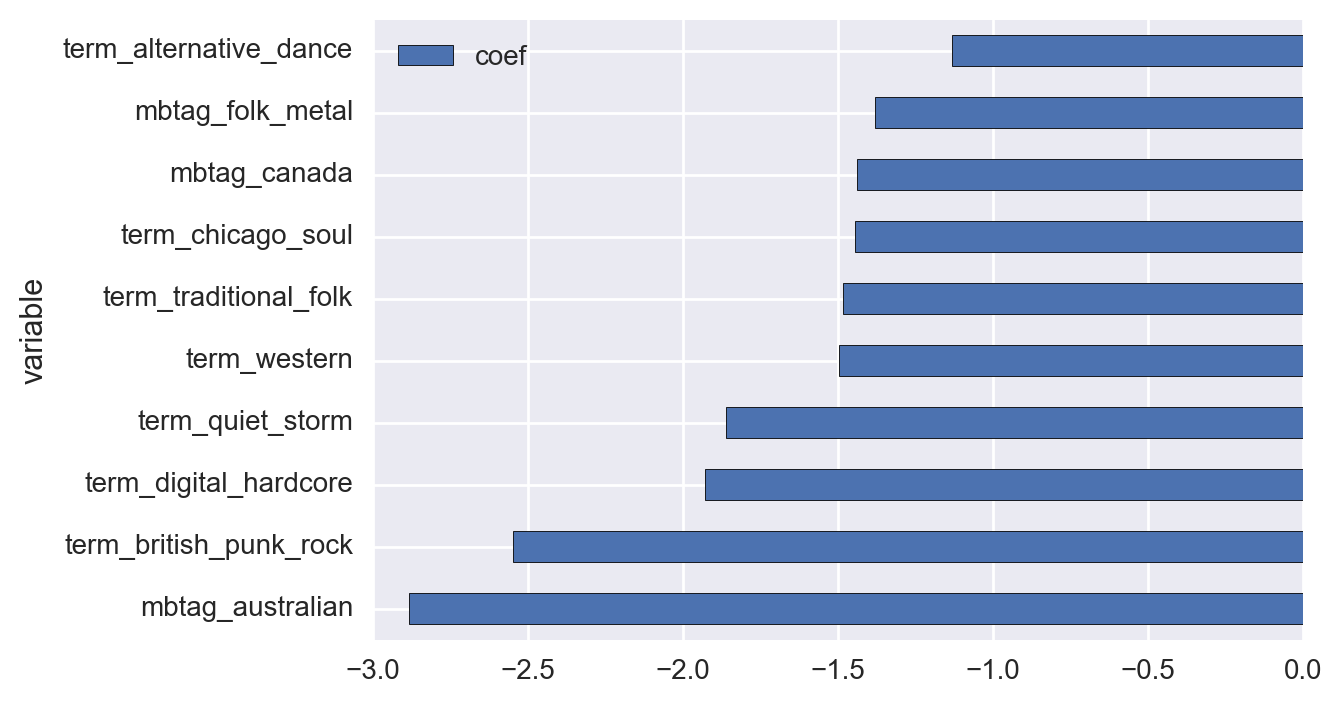

In [485]:
coefs_tag_fam.tail(10).sort_values('coef', ascending=True).plot(kind='barh', x='variable', y='coef')

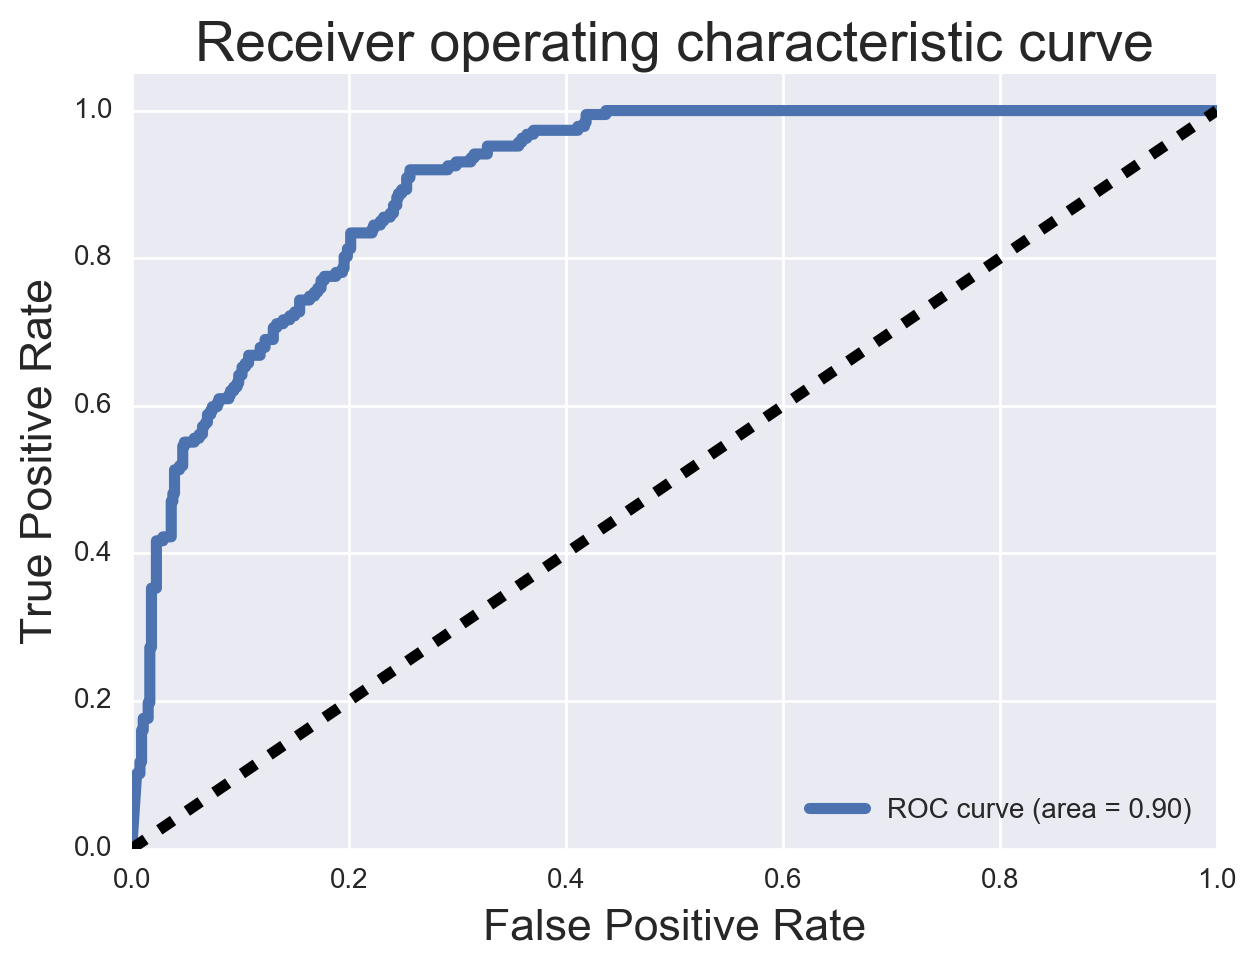

In [353]:
# Get out the predicted probabilities for the X observation matrix
y_pp = lrcv_tag_fam.predict_proba(X_test)

# roc_curve returns the false positive rate and true positive rates as the threshold changes
# takes in the y and the predicted probabilities of the positive class from your model.
fpr, tpr, _ = roc_curve(y_test, y_pp[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[7,5])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver operating characteristic curve', fontsize=20)
plt.legend(loc="lower right")
plt.show()

# Check that sub-genres are part of genres

In [334]:
df_genre_check

,genre_A,mbtag,track_id,title,song_id,release,artist_id,artist_mbid,artist_name,duration,artist_familiarity,artist_hotttnesss,year,genre_value,values
0,Blues,60s,1,1,1,1,1,1,1,1,1,1,1,1,1
1,Blues,acid rock,1,1,1,1,1,1,1,1,1,1,1,1,1
2,Blues,american,5,5,5,5,5,5,5,5,5,5,5,5,5
3,Blues,black metal,1,1,1,1,1,1,1,1,1,1,1,1,1
4,Blues,blues,14,14,14,14,14,14,14,14,14,14,14,14,14
5,Blues,blues rock,8,8,8,8,8,8,8,8,8,8,8,8,8
6,Blues,britannique,1,1,1,1,1,1,1,1,1,1,1,1,1
7,Blues,british,3,3,3,3,3,3,3,3,3,3,3,3,3
8,Blues,british blues,1,1,1,1,1,1,1,1,1,1,1,1,1
9,Blues,chicago blues,3,3,3,3,3,3,3,3,3,3,3,3,3


In [347]:
df_genre_check.sort_values('track_id',ascending=False).head(15)

,genre_A,mbtag,track_id,title,song_id,release,artist_id,artist_mbid,artist_name,duration,artist_familiarity,artist_hotttnesss,year,genre_value,values
612,Pop_Rock,rock,220,220,220,220,220,220,220,220,220,220,220,220,220
350,Pop_Rock,american,154,154,154,154,154,154,154,154,154,154,154,154,154
403,Pop_Rock,classic pop and rock,138,138,138,138,138,138,138,138,138,138,138,138,138
613,Pop_Rock,rock and indie,128,128,128,128,128,128,128,128,128,128,128,128,128
387,Pop_Rock,british,112,112,112,112,112,112,112,112,112,112,112,112,112
681,Pop_Rock,uk,104,104,104,104,104,104,104,104,104,104,104,104,104
687,Pop_Rock,usa,92,92,92,92,92,92,92,92,92,92,92,92,92
449,Pop_Rock,english,85,85,85,85,85,85,85,85,85,85,85,85,85
348,Pop_Rock,alternative rock,82,82,82,82,82,82,82,82,82,82,82,82,82
580,Pop_Rock,pop and chart,72,72,72,72,72,72,72,72,72,72,72,72,72


# Lyric Popularity

In [492]:
print 1-np.mean(y_test_l_tfidf)
print lasso_lr.score(X_test_l_tfidf, y_test_l_tfidf)

0.869845360825
0.865979381443


In [450]:
print 1-np.mean(y_test_l_count)
print lasso_lr_count.score(X_test_l_count, y_test_l_count)

0.878865979381
0.878865979381


# Conclusion

Hypothesis: A musician who is looking to become a sensation by posting music online, there are specific ways they can brand themselves and their songs to gain familiarity and popularity

+ Picking a specific genre can help a potential artist gain familiarity and popularity
+ Selecting certain classifier tags is in fact beneficial
+ Selecting certain words in your lyrics does not necessarily relate to whether or not a song or artist will be popular or familiar
+ The first features to master would be the “familiarity” tags due to the high score of the model

# Follow ups/Next Steps

+ Incorporating more data (Ex: tags, songs, lyrics with more n-gram variations), issue with combining multiple sources of data
+ Using lyric data that I’ve scrapped online
+ Going into specific genres and seeing what tags and features are most important for “Country” or “Electronic”
+ Look at topic modeling (unsupervised learning) for lyrics and see if they match up to specific genres
+ Incorporate user data and create a recommendation system
